# Vehicle Sales Analysis

Source: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

# Objective

Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.

# Imports

In [2]:
# For data manipulation
import numpy as np
import pandas as pd




In [3]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

**Load Dataset**

In [5]:
# Load dataset into a dataframe
# df = pd.read_csv('', index_col = 0) | use this to remove index column
df = pd.read_csv('car_prices.csv')


# Display first few rows of the dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Dictionary** 

Variable  |Description |
-----|-----|
Vehicle Details |Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.|
Transaction Information | Provides insights into the sales transactions, including selling prices and sale dates.|
Market Trends | MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.|
Condition and Mileage | Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.|

# Data Exploration 


## Statistics Summary

### Dataset Info

In [6]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Dataset consists of 

- 558837 rows and 16 columns
    - each row represents a vehicle
    - each column displays details about the vehicle
- 11 categorical columns: *make, model, trim, body, transmission, vin, state, color, interior, seller, saledate*
- 5 numerical columns: *year, condition, odometer, mmr, sellingprice*
- non-null counts show missing values in almost all columns except:  *year, state, seller*

In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


- **year**: the dataset includes vehicles with manufactured from years 1982 to 2015. The mean manufactured year is 2010.
- **condition:** vehicle conditions vary from 1 to 49, where 1 represents the poorest condition and 49 represents the best. On average, the vehicles are in a condition rated at 35.
- **odometer:** the odometer readings range from 0 to 999,999 miles and average odometer reading is 68,320 miles.
- **mmr:** the MMR values range from $25 to $182000. the average MMR value is $13,769.
- **selling price:** the selling prices range from $1 to $230,000. The average selling price is $13611.

**Size of Data**

In [8]:
# How large the dataset is. Total values across the whole data
df.size

8941392

**Separate numerical and categorical variables into different df**

In [9]:
# Find and list all categorical variables in the df
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Find and list all numerical variables in the df
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

# Print 
print('Categorical Variables:')
print(cat_cols)

print(' ')

print('Numerical Variables:')
print(num_cols)

Categorical Variables:
['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
 
Numerical Variables:
['year', 'condition', 'odometer', 'mmr', 'sellingprice']


## Understanding Categorical Variables

Begin by creating a function to find the unique value and counts for each categorical variable.

In [10]:
def unique_values(col):
  """
  This function prints the unique values for each object column.
  """

  # Count number of unique values 
  num_unique_values = df[col].nunique()
  print(f'Number of unique values: {num_unique_values}')

  print(' ')
  
  # Find out how many types exists for categorical column
  print(df[col].sort_values(ascending = True).unique())

### `make`

In [11]:
# apply function
unique_values('make')

Number of unique values: 96
 
['Acura' 'Aston Martin' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Daewoo' 'Dodge' 'FIAT' 'Ferrari' 'Fisker' 'Ford'
 'GMC' 'Geo' 'HUMMER' 'Honda' 'Hyundai' 'Infiniti' 'Isuzu' 'Jaguar' 'Jeep'
 'Kia' 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Lotus' 'MINI'
 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan'
 'Oldsmobile' 'Plymouth' 'Pontiac' 'Porsche' 'Ram' 'Rolls-Royce' 'Saab'
 'Saturn' 'Scion' 'Subaru' 'Suzuki' 'Tesla' 'Toyota' 'Volkswagen' 'Volvo'
 'acura' 'airstream' 'audi' 'bmw' 'buick' 'cadillac' 'chev truck'
 'chevrolet' 'chrysler' 'dodge' 'dodge tk' 'dot' 'ford' 'ford tk'
 'ford truck' 'gmc' 'gmc truck' 'honda' 'hyundai' 'hyundai tk' 'jeep'
 'kia' 'land rover' 'landrover' 'lexus' 'lincoln' 'maserati' 'mazda'
 'mazda tk' 'mercedes' 'mercedes-b' 'mercury' 'mitsubishi' 'nissan'
 'oldsmobile' 'plymouth' 'pontiac' 'porsche' 'smart' 'subaru' 'suzuki'
 'toyota' 'volkswagen' 'vw' nan]


There are 96 unique values for the car make. However, there are duplicated values due to data entry variations (i.e. Land Rover vs. land rover vs. landrover). 

The duplicates should be consolidated to improve data analysis and visualization.

### `model`

In [12]:
# apply function
unique_values('model')

Number of unique values: 973
 
['1' '1 Series' '1500' '190-Class' '2 Series' '200' '200SX' '2500' '3'
 '3 Series' '3 Series Gran Turismo' '300' '300-Class' '3000GT' '300M'
 '300ZX' '300e' '320i' '323i' '328i' '350' '3500' '350Z' '350z' '360'
 '370Z' '4 Series' '4 Series Gran Coupe' '400-Class' '420-Class' '420sel'
 '42c' '458 Italia' '4Runner' '5 Series' '5 Series Gran Turismo' '500'
 '500-Class' '500L' '500e' '6' '6 Series' '6 Series Gran Coupe' '626' '7'
 '7 Series' '750i' '750li' '750lxi' '8 Series' '850' '9-2X' '9-3' '9-5'
 '9-7X' '911' '940' '960' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'ATS' 'Acadia'
 'Accent' 'Accord' 'Accord Crosstour' 'Accord Hybrid' 'Achieva'
 'ActiveHybrid 5' 'ActiveHybrid 7' 'ActiveHybrid X6' 'Aerio' 'Alero'
 'Altima' 'Altima Hybrid' 'Amanti' 'Amigo' 'Armada' 'Ascender' 'Aspen'
 'Aspire' 'Astra' 'Astro' 'Astro Cargo' 'Aura' 'Aura Hybrid' 'Aurora'
 'Avalanche' 'Avalon' 'Avalon Hybrid' 'Avenger' 'Aveo' 'Aviator' 'Axiom'
 'Azera' 'Aztek' 'B-Class Electric Drive' 'B-Seri

There are 973 unique values for car model. Similar to the car make, the car model also shows duplicates that needs to be consolidated 

### `trim`


In [13]:
# apply function
unique_values('trim')

Number of unique values: 1963
 
['!' '& coun fwd' '& coun fwd limited' ... 'z06' 'zx3' nan]


Trim has the high count of unique values (1963). There doesnt seem to be any duplicated values here. 

### `body`


In [14]:
# apply function
unique_values('body')

Number of unique values: 87
 
['Access Cab' 'Beetle Convertible' 'CTS Coupe' 'CTS Wagon' 'CTS-V Coupe'
 'CTS-V Wagon' 'Cab Plus' 'Cab Plus 4' 'Club Cab' 'Convertible' 'Coupe'
 'Crew Cab' 'CrewMax Cab' 'Double Cab' 'E-Series Van' 'Elantra Coupe'
 'Extended Cab' 'G Convertible' 'G Coupe' 'G Sedan' 'G37 Convertible'
 'G37 Coupe' 'Genesis Coupe' 'GranTurismo Convertible' 'Hatchback'
 'King Cab' 'Koup' 'Mega Cab' 'Minivan' 'Navitgation'
 'Promaster Cargo Van' 'Q60 Convertible' 'Q60 Coupe' 'Quad Cab' 'Ram Van'
 'Regular Cab' 'SUV' 'Sedan' 'SuperCab' 'SuperCrew' 'TSX Sport Wagon'
 'Transit Van' 'Van' 'Wagon' 'Xtracab' 'access cab' 'beetle convertible'
 'cab plus 4' 'club cab' 'convertible' 'coupe' 'crew cab' 'crewmax cab'
 'cts coupe' 'cts wagon' 'cts-v coupe' 'double cab' 'e-series van'
 'elantra coupe' 'extended cab' 'g convertible' 'g coupe' 'g sedan'
 'g37 convertible' 'g37 coupe' 'genesis coupe' 'granturismo convertible'
 'hatchback' 'king cab' 'koup' 'mega cab' 'minivan' 'promaster carg

There are 87 unique values for car body. But it also shows duplicates that need to be consolidated 

### `transmission`


In [15]:
# apply function
unique_values('transmission')

Number of unique values: 4
 
['Sedan' 'automatic' 'manual' 'sedan' nan]


- There’s a total of 4 unique values here but Sedan and sedan are not valid entries. 
- Sedan/sedan should be under the body variable not transmission.

### `state`


In [16]:
# apply function
unique_values('state')

Number of unique values: 64
 
['3vwd17aj0fm227318' '3vwd17aj2fm258506' '3vwd17aj2fm261566'
 '3vwd17aj2fm285365' '3vwd17aj3fm259017' '3vwd17aj3fm276741'
 '3vwd17aj4fm201708' '3vwd17aj4fm236636' '3vwd17aj5fm206111'
 '3vwd17aj5fm219943' '3vwd17aj5fm221322' '3vwd17aj5fm225953'
 '3vwd17aj5fm268964' '3vwd17aj5fm273601' '3vwd17aj5fm297123'
 '3vwd17aj6fm218641' '3vwd17aj6fm231972' '3vwd17aj7fm218440'
 '3vwd17aj7fm222388' '3vwd17aj7fm223475' '3vwd17aj7fm229552'
 '3vwd17aj7fm326640' '3vwd17aj8fm239622' '3vwd17aj8fm298895'
 '3vwd17aj9fm219766' '3vwd17ajxfm315938' 'ab' 'al' 'az' 'ca' 'co' 'fl'
 'ga' 'hi' 'il' 'in' 'la' 'ma' 'md' 'mi' 'mn' 'mo' 'ms' 'nc' 'ne' 'nj'
 'nm' 'ns' 'nv' 'ny' 'oh' 'ok' 'on' 'or' 'pa' 'pr' 'qc' 'sc' 'tn' 'tx'
 'ut' 'va' 'wa' 'wi']


There are 64 unique values for state but it seems the vin data are entered into this column by mistake. 

### `color`


In [17]:
# apply function
unique_values('color')

Number of unique values: 46
 
['11034' '1167' '12655' '14872' '15719' '16633' '18384' '18561' '20379'
 '20627' '2172' '2711' '2817' '2846' '339' '4802' '5001' '5705' '6158'
 '6388' '6864' '721' '9410' '9562' '9837' '9887' 'beige' 'black' 'blue'
 'brown' 'burgundy' 'charcoal' 'gold' 'gray' 'green' 'lime' 'off-white'
 'orange' 'pink' 'purple' 'red' 'silver' 'turquoise' 'white' 'yellow' '—'
 nan]


- The unique values for color shows similar data entry errors as seen in the transmission and state columns
- Here, the dash symbol (-) is redundant and can be converted to NaN instead. 

### `interior`


In [18]:
# apply function
unique_values('interior')

Number of unique values: 17
 
['beige' 'black' 'blue' 'brown' 'burgundy' 'gold' 'gray' 'green'
 'off-white' 'orange' 'purple' 'red' 'silver' 'tan' 'white' 'yellow' '—'
 nan]


Again, the dash symbol (-) is redundant and can be converted to NaN instead. 

### **Summary of Findings**

- **make, model, body** : there were duplicated values due to text variations
- **transmission**: data entry error found with the presence of *sedan* as it is not a valid value for this variable. The only valid values would be either *automatic,* *manual, NaN*.
- **trim**: no issues found
- **state**: another indication of data entry error as vin numbers are present in this column.
- **color**: potential data entry error with mix of text and numeric values detected.
- **interior**: redundant ‘-’ value that can be replaced with NaN

## Data Structuring

1. Consolidate unique values in the ***make*, *model*, *body*** columns
2. Fix data entry errors in ***transmission***, ***state***, ***color*** columns 
3. Split ***saledate*** columns into different date columns (day, month, year etc. )

### Consolidate unique values

In [19]:
# create new dataframe
df1 = df.copy()
df1.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


`make`

In [20]:
# create a dictionary of replacements
make_replacements = {
                    'Volvo': 'volvo',
                    'vw': 'volkswagen',
                    'Jaguar': 'jaguar',
                    'Volkswagen': 'volkswagen',
                    'Suzuki':'suzuki', 
                    'Subaru': 'subaru', 
                    'Porsche': 'porsche',
                    'Pontiac': 'pontiac',
                    'Plymouth':'plymouth',
                    'Oldsmobile':'oldsmobile',
                    'Mitsubishi':'mitsubishi', 
                    'Mercury':'mercury',
                    'Maserati': 'maserati',
                    'Hyundai': 'hyundai',
                    'hyundai tk': 'hyundai',
                    'Honda':'honda',
                    'Ford':  'ford',
                    'Acura': 'acura',
                    'Audi':'audi',
                    'BMW': 'bmw',
                    'Buick': 'buick', 
                    'Lincoln': 'lincoln',
                    'Lexus': 'lexus',
                    'Toyota': 'toyota',
                    'GMC': 'gmc',
                    'gmc truck':'gmc',
                    'Mercedes-Benz': 'mercedes',
                    'mercedes-b': 'mercedes',
                    'Mazda':'mazda',
                    'mazda tk': 'mazda',
                    'landrover':  'land rover',
                    'Pontiac': 'pontiac',
                    'ford tk': 'ford', 
                    'ford truck': 'ford', 
                    'Chevrolet': 'chevrolet',
                    'chev truck': 'chevrolet',
                    'Cadillac': 'cadillac',
                    'Nissan':  'nissan', 
                    'Chrysler':'chrysler',
                    'Dodge':'dodge', 
                    'dodge tk':'dodge',
                    'Kia':'kia',
                    'Jeep': 'jeep',
                    'MINI':'mini',
                    'FIAT':'fiat',
                    'Ferrari': 'ferrari',
                    'Ram': 'ram',
                    'Bentley':'bentley',
                    'Saturn':'saturn',
                    'HUMMER': 'hummer',
                    'Saab':'saab',
                    'Rolls-Royce':'rolls royce',
                    'Daewoo':'daewoo',
                    'Isuzu': 'isuzu',
                    'Geo': 'geo',
                    'Tesla':'tesla',
                    'Aston Martin': 'aston martin',
                    'Fisker': 'fisker',
                    'Lamborghini':'lamborghini',
                    'Lotus':'lotus',
                    'Infiniti':'infiniti',
                    'Land Rover':'land rover',
                    'Scion':'scion',
                    'dot':'dodge'
                     }

# replace values using the .map() method
df1['make'] = df1['make'].map(make_replacements).fillna(df1['make'])

# print the DataFrame
df1['make'].sort_values(ascending=True).unique()

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus',
       'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi',
       'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

Now the data no longer contains duplicate unique values. Let’s repeat similar replacements for model and body variables.

`model`

In [21]:
# create a dictionary of replacements
model_replacements = { 
                     'A4':'a4',
                     'A6': 'a6',
                     'Accord': 'accord',
                     'Alero': 'alero',
                     'Astro': 'astro',
                     'Avalon': 'avalon',
                     'Avenger': 'avenger',
                     'Aveo': 'aveo',
                     'Beetle': 'beetle',
                     'Borrego': 'borrego',
                     'Breeze': 'breeze',
                     'CX-7': 'cx-7',
                     'Camaro': 'camaro',
                     'Camry': 'camry',
                     'Caravan': 'caravan',
                     'Cavalier': 'cavalier',
                     'Century': 'century',
                     'Charger': 'charger',
                     'Cherokee': 'cherokee',
                     'Civic': 'civic',
                     'Civic del Sol': 'cobalt',
                     'Classic': 'colorado',
                     'Commander': 'comm',
                     'Compass': 'compass',
                     'Concorde': 'concorde',
                     'Corolla': 'corolla',
                     'Corsica': 'corsica',
                     'Corvette': 'corvette',
                     'Cougar': 'cougar',
                     'Crossfire': 'crossfire',
                     'Crown Victoria': 'crown',
                     'Cruze': 'cruze',
                     'DTS': 'dts',
                     'Dakota': 'dakota',
                     'Discovery': 'discovery',
                     'Durango': 'durango',
                     'E-150': 'e150',
                     'E-250': 'e250',
                     'E-350': 'e350',
                     'Elantra': 'elantra',
                     'Endeavor': 'endeavor',
                     'Envoy': 'envoy',
                     'Equinox': 'equinox',
                     'Escalade': 'escalade',
                     'Escape': 'escape',
                     'EuroVan': 'eurovan',
                     'Excursion': 'excurs',
                     'Expedition': 'expedition',
                     'expedit': 'expedition',
                     'expeditn': 'expedition',
                     'Explorer': 'explorer',
                     'F-150': 'f150',
                     'F-250': 'f250',
                     'F-350 Super Duty': 'f350',
                     'Focus': 'focus',
                     'Forester': 'forester',
                     'Freestyle': 'freestyle',
                     'G5': 'g5',
                     'G6': 'g6',
                     'Galant': 'galant',
                     'Golf': 'golf',
                     'GranSport': 'grand',
                     'GranTurismo': 'gx',
                     'Impala': 'impala',
                     'Intrepid': 'intrepid',
                     'Intrigue': 'intrigue',
                     'Jetta': 'jetta',
                     'Journey': 'journey',
                     'LR3': 'lr3',
                     'LaCrosse': 'lacrosse',
                     'Lancer': 'lancer',
                     'Legacy': 'legacy',
                     'Legend': 'lumina',
                     'Magnum': 'magnum',
                     'Malibu': 'malibu',
                     'Matrix': 'matrix',
                     'Mazda3': 'mazda3',
                     'Mazda5': 'mazda5',
                     'Mazda6': 'mazda6',
                     'Montana': 'montana',
                     'Mountaineer': 'mountaineer',
                     'mountnr': 'mountaineer',
                     'Neon': 'neon',
                     'Odyssey': 'odyssey',
                     'Optima': 'optima',
                     'Pacifica': 'pacifica',
                     'Passat': 'passat',
                     'Pathfinder': 'pathfinder',
                     'pathfind': 'pathfinder',
                     'Patriot': 'patriot',
                     'Pickup': 'pickup',
                     'Pilot': 'pilot',
                     'Quattroporte': 'quattroporte',
                     'Quest': 'quest',
                     'RL': 'rl',
                     'RS 7': 'rr',
                     'RX-8': 'rx8',
                     'Rainier': 'rainier',
                     'Ram Cargo': 'ram',
                     'Ram Pickup 3500': 'ram3500',
                     'Range Rover': 'rangerover',
                     'range': 'rangerover',
                     'ranger': 'rangerover',
                     'Range Rover Sport': 'rrs',
                     'Regal': 'regal',
                     'Ridgeline': 'ridgelin',
                     'Rio': 'rio',
                     'Routan': 'routan',
                     'S-10': 's10',
                     'SRX': 'srx',
                     'STS': 'sts',
                     'SX4': 'sx4',
                     'Safari': 'safari',
                     'Santa Fe': 'santa',
                     'Savana': 'savana',
                     'Sebring': 'sebring',
                     'Sienna': 'sienna',
                     'Sierra 1500': 'siera',
                     'Silhouette': 'silhouette',
                     'Sonic': 'sonic',
                     'Sonoma': 'sonoma',
                     'Sportage': 'sportage',
                     'Sprinter': 'sprinter',
                     'Stratus': 'stratus',
                     'Suburban': 'suburban',
                     'subrbn': 'suburban',
                     'Tahoe': 'tahoe',
                     'Taurus': 'taurus',
                     'Thunderbird': 'thunderbird',
                     'Town Car': 'town',
                     'Town and Country': 'twn&country',
                     'twn/cntry': 'twn&country',
                     'Tribute': 'tribute',
                     'Tucson': 'tucson',
                     'Tundra': 'tundra',
                     'Uplander': 'uplander',
                     'uplandr': 'uplander',
                     'Venture': 'venture',
                     'Versa': 'versa',
                     'Vibe': 'vibe',
                     'Villager': 'villager',
                     'Voyager': 'voyager',
                     'Windstar': 'windstar',
                     'Wrangler': 'wrangler',
                     'X3': 'x3',
                     'Yaris': 'yaris',
                     'Yukon': 'yukon'

                     }

# replace values using the .map() method
df1['model'] = df1['model'].map(model_replacements).fillna(df1['model'])

# print the DataFrame
df1['model'].sort_values(ascending=True).unique()

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A5', 'A7', 'A8', 'ATS', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Achieva', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro Cargo', 'Aura', 'Aura Hybrid', 'Aurora',
       'Avalanche

`body`

In [22]:

# create a dictionary of replacements
body_replacements = {'Access Cab':  'access cab',
                    'CTS Coupe': 'cts coupe',
                    'Beetle Convertible': 'beetle convertible', 
                    'CTS Wagon':'cts wagon',
                    'CTS-V Coupe':'cts-v coupe',
                    'CTS-V Wagon': 'cts-v wagon',
                    'Cab Plus 4': 'cab plus 4',
                    'Club Cab': 'club cab',
                    'Convertible': 'convertible', 
                    'Coupe': 'coupe',
                    'Crew Cab': 'crew cab',
                    'CrewMax Cab': 'crewmax cab',
                    'Double Cab':'double cab',
                    'E-Series Van':  'e-series van',
                    'Elantra Coupe': 'elantra coupe', 
                    'Extended Cab': 'extended cab', 
                    'G Convertible': 'g convertible',
                    'G Coupe': 'g coupe',
                    'G Sedan': 'g sedan', 
                    'G37 Convertible':'g37 convertible',
                    'G37 Coupe':'g37 coupe',
                    'Genesis Coupe': 'genesis coupe',
                    'GranTurismo Convertible': 'granturismo convertible',
                    'Hatchback':'hatchback',
                    'King Cab': 'king cab',
                    'Koup':  'koup',
                    'Mega Cab':  'mega cab',
                    'Minivan':  'minivan',
                    'Promaster Cargo Van': 'promaster cargo van', 
                    'Q60 Convertible': 'q60 convertible',
                    'Q60 Coupe':  'q60 coupe',
                    'Quad Cab':'quad cab',
                    'Regular Cab': 'regular cab', 
                    'regular-cab': 'regular cab',
                    'SUV': 'suv',
                    'Sedan': 'sedan',
                    'SuperCab':  'supercab',
                    'SuperCrew':'supercrew', 
                    'TSX Sport Wagon': 'tsx sport wagon',
                    'Transit Van': 'transit van',
                    'Van':  'van',
                    'Wagon': 'wagon',
                    'Xtracab': 'xtracab',
                    'Cab Plus':'cab plus',
                    'Navitgation':'navitgation',
                    'Ram Van':'ram van'
                     }

# replace values using the .map() method
df1['body'] = df1['body'].map(body_replacements).fillna(df1['body'])

# print the DataFrame
df1['body'].sort_values(ascending=True).unique()

array(['access cab', 'beetle convertible', 'cab plus', 'cab plus 4',
       'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab',
       'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon',
       'double cab', 'e-series van', 'elantra coupe', 'extended cab',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'genesis coupe', 'granturismo convertible',
       'hatchback', 'king cab', 'koup', 'mega cab', 'minivan',
       'navitgation', 'promaster cargo van', 'q60 convertible',
       'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'sedan',
       'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon',
       'van', 'wagon', 'xtracab', nan], dtype=object)

### Fix data entry errors

`transmission`

Since there are two values for Sedan/sedan, let's combine them first to simplify the process.

In [23]:
#Replace 'Sedan' with all lowercase 'sedan'
df1['transmission'].replace('Sedan', 'sedan', inplace=True)

# Display unique values
df1['transmission'].sort_values(ascending=True).unique()

C:\Users\tunhi\AppData\Local\Temp\ipykernel_1796\3004760410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['transmission'].replace('Sedan', 'sedan', inplace=True)


array(['automatic', 'manual', 'sedan', nan], dtype=object)

In [24]:
# Create a subset df to filter rows where transmission equals sedan 
sedan_subset = df1.loc[df1['transmission'] == 'sedan' ]

# check row count for subset
print('Subset Row Count: ',sedan_subset.shape[0])

#Display
sedan_subset.head()

Subset Row Count:  26


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300


- there is a total of 26 rows in the dataframe where transmission = sedan
- The year, make, model column data looks correct. 
- However, all data to the right are not.  
- For instance, 'sedan' should be listed under **body** column instead of **transmission**, 'automatic' should be under the **transmission** instead of **vin** and so on
- The error is because the data from **trim** to **saledate** are placed in the wrong column 
- This can be fixed by shifting them one column over to the left.

**Split sedan_subset into left and right sections**

`left section`

In [25]:
# separate 'year','make','model' columns from subet because they are correct.
sedan_left=sedan_subset[['year','make','model']]
sedan_left.head()


,year,make,model
408161,2015,volkswagen,jetta
417835,2015,volkswagen,jetta
421289,2015,volkswagen,jetta
424161,2015,volkswagen,jetta
427040,2015,volkswagen,jetta


 This left section contains the first 3 columns (year, make, model) which are correct and does not need to be shifted

`right section`

In [26]:
# create df for right side columns where data is incorrect and
# needs to be shifted by dropping the first 3 columns that are correct

sedan_right=sedan_subset.drop(columns=['year','make','model'])
sedan_right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300


The right section are all columns with data errors and needs to be shifted to the left

**Shift all columns to the left once**

In [27]:
sedan_right = sedan_right.shift(-1, axis=1)
sedan_right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None
417835,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None
421289,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None
424161,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None
427040,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None


Notice how the data are now in the correct column. However, this means there are no **saledate** data for these rows.

**Merge both left and right sections back together**

In [28]:
# Merge the left and right sections
sedan_subset2 = sedan_left.merge(sedan_right, right_index=True, left_index=True)
sedan_subset2.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None
417835,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None
421289,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None
424161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None
427040,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None


In [29]:
# create a new dataframe 
df2 = df1.copy()

# create variable to store rows where transmission = sedan
drop_rows = df2[df2['transmission'] == 'sedan'].index

# drop all rows with incorrect data where transmission = sedan from df2
df2.drop(drop_rows, inplace=True)

# validate rows are dropped
print('No. of rows in original df: ',df.shape[0])
print('No. of rows in df2: ',df2.shape[0])


No. of rows in original df:  558837
No. of rows in df2:  558811


Now that the rows with incorrect data are dropped from the dataframe, we can add back the sedan_subset with the corrected data

In [30]:
# concat the corrected rows from the sedan_subset2 back to the main df
df2 = pd.concat([df2, sedan_subset2], axis=0)

# compare shape of both df1 and df2
print(df1.shape)
print(df2.shape)

(558837, 16)
(558837, 16)


shape is now same as original after the rows were added back in

**Validate changes by checking the unique values in transmission column**

In [31]:
# Find out how many types exists for categorical column
df2['transmission'].sort_values(ascending = True).unique()

array(['automatic', 'manual', nan], dtype=object)

this confirms sedan is no longer present in this column

**Let's update the df_ver notes**

In [32]:
df_ver =   'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors '
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 


### Check other columns with data errors

- state
- color

`state`

In [33]:
# Find out how many types exists for categorical column
df2['state'].sort_values(ascending = True).unique()

array(['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
       'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns',
       'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn',
       'tx', 'ut', 'va', 'wa', 'wi', nan], dtype=object)

The column shifting fixed errors in the **state** column too. It no longer shows vin data

`color`

In [34]:
# Find out how many types exists for categorical column
df2['color'].sort_values(ascending = True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold',
       'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple',
       'red', 'silver', 'turquoise', 'white', 'yellow', '—', nan],
      dtype=object)

It also fixed the **color** column as it no longer shows numeric data. However, we should remove the dash symbol(-)

### Convert (-) to Nan in **color** and **interior**

In [35]:
# counts no. of rows where color = -
print('Count of (—) in color:',df2.loc[df2['color'] == '—' ].shape[0],'rows')

# counts no. of rows where color = -
print('Count of (—) in interior:', df2.loc[df2['interior'] == '—' ].shape[0],'rows')


Count of (—) in color: 24686 rows
Count of (—) in interior: 17076 rows


In [36]:
# make a copy of the dataframe and save as new version
df3 = df2.copy()

# Replace the '-' symbol with NaN
df3['color'].replace('—', np.nan,inplace=True)
df3['interior'].replace('—', np.nan,inplace=True)

# counts no. of rows where color = -
print('Count of (—) in color:',df3.loc[df3['color'] == '—' ].shape[0],'rows')

# counts no. of rows where color = -
print('Count of (—) in interior:', df3.loc[df3['interior'] == '—' ].shape[0],'rows')

Count of (—) in color: 0 rows
Count of (—) in interior: 0 rows


C:\Users\tunhi\AppData\Local\Temp\ipykernel_1796\4240662727.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['color'].replace('—', np.nan,inplace=True)
C:\Users\tunhi\AppData\Local\Temp\ipykernel_1796\4240662727.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [37]:
# check unique values for color
print(df3['color'].sort_values(ascending=True).unique())

print('')
print(df3['interior'].sort_values(ascending=True).unique())


['beige' 'black' 'blue' 'brown' 'burgundy' 'charcoal' 'gold' 'gray'
 'green' 'lime' 'off-white' 'orange' 'pink' 'purple' 'red' 'silver'
 'turquoise' 'white' 'yellow' nan]

['beige' 'black' 'blue' 'brown' 'burgundy' 'gold' 'gray' 'green'
 'off-white' 'orange' 'purple' 'red' 'silver' 'tan' 'white' 'yellow' nan]


Changes are complete as the dash symbol is no longer present in **color** and **interior**

**Let's update the df_ver notes**
df3 = split saledate column and dropped saledate,time,GMT,and PST columns

In [38]:
df_ver =   'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors \ndf3: convert "-" in color and interior to nan.'
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 
df3: convert "-" in color and interior to nan.


### Split `saledate` column

the **saledate** column contains a concatentation of weekday, month, year, time, GMT, and PST information. Let's split it into separate columns using space as a delimiter.

In [39]:
df4 = df3.copy()

# create new columns to store data from `saledate`
df4[['weekday','month','day','sale_year','time','GMT','PST']] = df4['saledate'].str.split(' ',expand=True)

# drop unecessary columns 
df4 = df4.drop(columns=['saledate','time','GMT','PST','vin'])

# Display df
df4.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014


**Let's update the df_ver notes**


In [40]:
df_ver =   'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors \ndf3: convert "-" in color and interior to nan.\ndf4: split saledate column and dropped saledate,time,GMT,and PST columns '
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 
df3: convert "-" in color and interior to nan.
df4: split saledate column and dropped saledate,time,GMT,and PST columns 


## Data Cleaning

### Check for Missing Values

In [41]:
mask = df.isna().any(axis=1)
df_missing_rows = df[mask]
df_missing_rows

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
14,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sbxe7120097,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
16,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh001562,ca,NaN,8311.0,red,—,avis tra,15200.0,4200.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
22,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,NaN,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
25,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh038482,ca,NaN,9281.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,15150.0,8500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
28,2014,BMW,X5,sDrive35i,SUV,automatic,5uxkr2c52e0h33130,ca,NaN,11278.0,gray,black,avis rac/san leandro,50400.0,34000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558814,2014,Dodge,Charger,SE,Sedan,NaN,2c3cdxbg3eh324197,va,43.0,20485.0,white,black,hertz corporation/gdp,16350.0,16100.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558820,2014,Dodge,Charger,SE,Sedan,NaN,2c3cdxbg9eh324236,va,42.0,22744.0,white,black,hertz corporation/gdp,16250.0,15900.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Limited,Sedan,NaN,5npdh4ae7ch106397,pa,4.0,66720.0,gray,gray,champion mazda,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558830,2012,Nissan,Sentra,2.0 SR,Sedan,NaN,3n1ab6ap3cl622485,tn,26.0,35858.0,white,gray,nissan-infiniti lt,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)


In [42]:
# Get a count of  missing values in dataframe
sum_missing = df4.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df4.isna().sum().sum())/df.size
print(f'Total % of missing values: {percent_missing:.2f}%')


# Display missing values per column in dataframe
print('Missing values per column:')
df4.isna().sum()



Total count of missing values: 165278
Total % of missing values: 1.85%
Missing values per column:


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65356
state              26
condition       11794
odometer           94
color           25435
interior        17825
seller             26
mmr                12
sellingprice       12
weekday            38
month              38
day                38
sale_year          38
dtype: int64

**Findings**

- All columns except the year and vin columns has missing values
- ***transmission*** has the most NaN cells, most likely due to the NaN in the date columns
- ***make***: the missing values can be filled if both ***model*** and ***trim*** data is available
- ***model***:  the missing values can be filled if both ***make*** and ***trim*** data is available
- Since 1.85% of missing values is relatively small compared to the data size, it’s possible to drop all the rows with missing data.
- However, if it were a more significant percent, we can look into filling in the make and model columns with the following technique.


#### Filling missing values for model 

In [43]:
# filter rows where model is null but make and trim are not null
mask_model_nan = df4.loc[df4['make'].notnull() & df4['model'].isnull() & df4['trim'].notnull() ]

# count the filtered rows
print(mask_model_nan.shape[0])

#display rowos
mask_model_nan.head()

98


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014


There are 98 rows where the model data is missing but both the make and trim are available. Again, this is a small number of rows compared to nearly 560k rows of data. 

In [44]:
# find unique make and trim from this mask
print(mask_model_nan['make'].unique())
print(mask_model_nan['trim'].unique())

['bmw' 'audi']
['750Li' '750i' '750Li xDrive' '2.0 TFSI Premium quattro' '750i xDrive'
 '650i xDrive']


There’s only 2 car makers in this subset: Audi and BMW and a handful of trims. Based on this information, the model can be found with a quick google search

Models for these trim are found on google

- '750Li' = '7 Series'
- '750i'  = '7 Series'
- '750Li xDrive' = '7 Series'
- '2.0 TFSI Premium quattro'= Q3
- '750i xDrive'= '7 Series'
- '650i xDrive' = '6 Series'

In [45]:
# create new dataframe to store updated data
df5 = df4.copy()
df5.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,2014


In [46]:
# Replace missing model values with correct model found on google
df5['model'].mask((df5['trim'] =='750Li') & (df5['model'].isnull()) ,'7 Series', inplace=True)
df5['model'].mask((df5['trim'] =='750i') & (df5['model'].isnull()),'7 Series', inplace=True)
df5['model'].mask((df5['trim'] =='750Li xDrive') & (df5['model'].isnull()) ,'7 Series', inplace=True)
df5['model'].mask((df5['trim'] =='750i xDrive') & (df5['model'].isnull()) ,'7 Series', inplace=True)
df5['model'].mask((df5['trim'] =='650i xDrive') & (df5['model'].isnull()) ,'6 Series', inplace=True)
df5['model'].mask((df5['trim'] =='2.0 TFSI Premium quattro') & (df5['model'].isnull()) ,'Q3', inplace=True)

C:\Users\tunhi\AppData\Local\Temp\ipykernel_1796\2412545274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['model'].mask((df5['trim'] =='750Li') & (df5['model'].isnull()) ,'7 Series', inplace=True)
C:\Users\tunhi\AppData\Local\Temp\ipykernel_1796\2412545274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

#### Validate changes
Row 72 previously has no model data, check if the model infomration is updated now

In [47]:
df5.loc[72]

year                                              2014
make                                               bmw
model                                         7 Series
trim                                             750Li
body                                             sedan
transmission                                 automatic
state                                               ca
condition                                         43.0
odometer                                       12172.0
color                                            black
interior                                         black
seller          financial services remarketing (lease)
mmr                                            67000.0
sellingprice                                   66000.0
weekday                                            Thu
month                                              Dec
day                                                 18
sale_year                                         2014
Name: 72, 

In [48]:
# check is there's any rows with missing models where trim and make is available
df5.loc[df5['make'].notnull() & df5['model'].isnull() & df5['trim'].notnull() ]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year


In [49]:
# Display missing values per column in dataframe
print('Missing values per column:')
df5[['make','model']].isna().sum()

Missing values per column:


make     10301
model    10301
dtype: int64

 confirm there's a decreased in missing values for model column

#### Review Make's missing value

In [50]:
# create a mask to see how many rows have no data for make but there's data for model and trim
mask_make_nan = df5.loc[df5['make'].isnull() & df5['model'].notnull() & df5['trim'].notnull() ]
print(mask_make_nan.shape[0])
mask_make_nan.head()

0


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year


There's none. this is as much as we can replace. Cannot infer trim with existing model and make because there are too many options.

In [51]:
df_ver = 'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors \ndf3: convert "-" in color and interior to nan.\ndf4: split saledate column and dropped saledate,time,GMT,and PST columns \ndf5: filled in missing values for model.'
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 
df3: convert "-" in color and interior to nan.
df4: split saledate column and dropped saledate,time,GMT,and PST columns 
df5: filled in missing values for model.


### Duplicates

The duplicated() function will only return entire rows that have exactly matching values, not just individual matching values found within a column. 

In [52]:
# Check for duplicates
print('Shape of dataframe:', df5.shape)
print('Shape of dataframe with duplicates dropped:', df5.drop_duplicates().shape)

df5_row = len(df)
df5_row_no_dupe = len(df.drop_duplicates())
df5_row_dupe = df5_row - df5_row_no_dupe

print('No. of rows with duplicates :', df5_row_dupe)

Shape of dataframe: (558837, 18)
Shape of dataframe with duplicates dropped: (558837, 18)
No. of rows with duplicates : 0


no duplicates in the df

### Outliers

In [53]:
df5.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'weekday', 'month', 'day', 'sale_year'],
      dtype='object')

In [54]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   state         558811 non-null  object 
 7   condition     547043 non-null  float64
 8   odometer      558743 non-null  object 
 9   color         533402 non-null  object 
 10  interior      541012 non-null  object 
 11  seller        558811 non-null  object 
 12  mmr           558825 non-null  float64
 13  sellingprice  558825 non-null  object 
 14  weekday       558799 non-null  object 
 15  month         558799 non-null  object 
 16  day           558799 non-null  object 
 17  sale_year     558799 non-null  object 
dtypes: float6

**Odometer** and **selling** price was converted to object type during the analysis. Convert them back to float to begin data visualizations.

**Convert to Float**

In [55]:
### Convert Column '' to Float
df6 = df5.copy()
df6 = df6.astype({'odometer': float,
                  'sellingprice': float
                  })

In [56]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   state         558811 non-null  object 
 7   condition     547043 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         533402 non-null  object 
 10  interior      541012 non-null  object 
 11  seller        558811 non-null  object 
 12  mmr           558825 non-null  float64
 13  sellingprice  558825 non-null  float64
 14  weekday       558799 non-null  object 
 15  month         558799 non-null  object 
 16  day           558799 non-null  object 
 17  sale_year     558799 non-null  object 
dtypes: float6

In [57]:
df_ver = 'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors \ndf3: convert "-" in color and interior to nan.\ndf4: split saledate column and dropped saledate,time,GMT,and PST columns \ndf5: filled in missing values for model. \ndf6: convert continuous columns back to float.'
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 
df3: convert "-" in color and interior to nan.
df4: split saledate column and dropped saledate,time,GMT,and PST columns 
df5: filled in missing values for model. 
df6: convert continuous columns back to float.


**Boxplot for numeric variables**

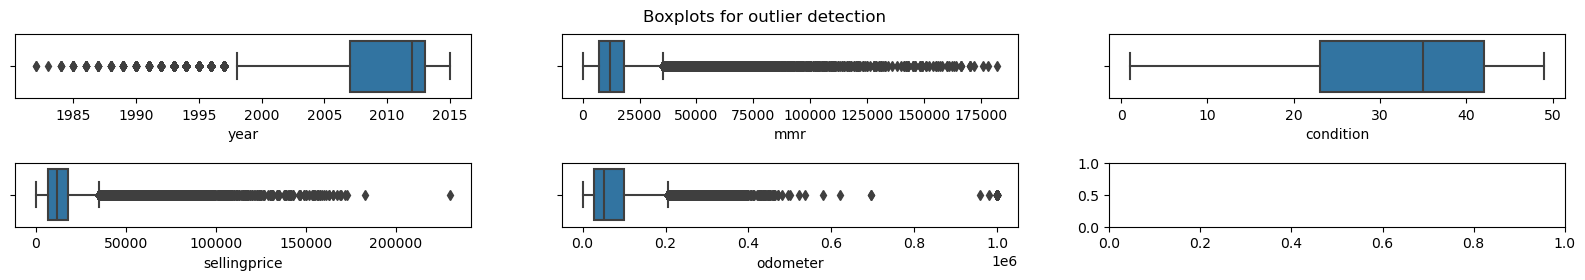

In [58]:
# create 2 x 3 figure
fig, axes = plt.subplots(2, 3, figsize=(20, 2.5))
fig.suptitle('Boxplots for outlier detection')

# plot first 3 variables
sns.boxplot(ax=axes[0,0], x=df6['year'])
sns.boxplot(ax=axes[0,1], x=df6['mmr'])
sns.boxplot(ax=axes[0,2], x=df6['condition'])

# add spacing between the rows
plt.subplots_adjust(hspace=1) 

sns.boxplot(ax=axes[1,0], x=df6['sellingprice'])
sns.boxplot(ax=axes[1,1], x=df6['odometer'])
plt.show();

Outliers are detected in **year**, **mmr**, **sellingprice** and **odometer** variables. 

## Data Analysis

### Numerical Variables

Create a function to generate the boxplot, histogram, and outlier calculations

In [59]:
# Define function to create box plot for variables in the df
def htplt(col): 
    
    #Print Skew amount
    skew =  round(df6[col].skew(), 2)
    if skew > 0.5:
        print('Right Skew:',skew)
    elif skew < -0.5:
        print('Left Skew:',skew)
    else:
        print('Normal:',skew)

    # condition statement to print either median or mean
    if skew > 0.5:                          #print median
        median = df6[col].median()
        print('Median:', df6[col].median())
        line = median
    elif skew <- 0.5:
        median = df6[col].median()           #print median
        print('Median:', df6[col].median()) 
        line = median   
    else:
        mean = df6[col].mean()               #Print mean
        print('Mean:', df6[col].mean())
        line = mean

    # Compute the 25th percentile value 
    percentile25 = df6[col].quantile(0.25)

    # Compute the 75th percentile value 
    percentile75 = df6[col].quantile(0.75)

    # Compute the interquartile range 
    iqr = percentile75 - percentile25

    # Define the upper limit and lower limit for non-outlier values in ``
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('LL:', lower_limit, '|', 'UL:', upper_limit)

    # Identify subset of data containing outliers in ``
    outliers = df6[(df6[col] > upper_limit) | (df6[col] < lower_limit)]

    # Count how many rows in the data contain outliers in ``
    print('Rows of outliers :', len(outliers))
    print(' ')

    
    # Plot Histogram         
    plt.xticks(rotation=45) 
    plt.title(f'{col} histogram')
    sns.histplot(x=df6[col])
    

#### `Year`(Manufacturing)

Left Skew: -1.18
Median: 2012.0
LL: 1998.0 | UL: 2022.0
Rows of outliers : 4021
 


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


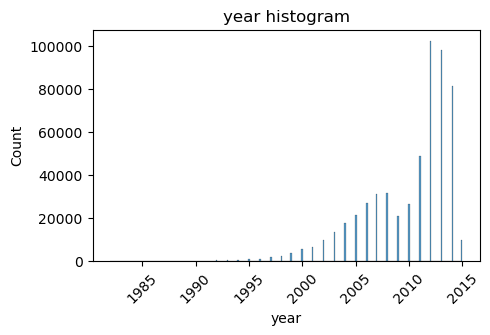

In [60]:
#Set plot size 
plt.figure(figsize = (5, 3)) 

# apply plot function 
htplt('year')

- The manufactured year for the vehicles range from 1980s to 2015. 
- The data is skewed to the left indicating a steady increase in the number of sales transaction for newer vehicles 
- However, there's two noticeable drops in 2008 and after 2012.
    - The financial crisis of 2007-2008 may be a cause for the drop in 2008.
    - Detroit filed bankruptcy in 2013 may have affected the vehicle production as the big 3 automakers have facilities there too. 
- Most sales were for vehicles manufactured in 2012, followed by 2013, 2014
- Half of vehicles in the dataset are manufactured before 2012 and half are manufactured after 2012. 
- There are 4021 vehicles manufactured before 1998 in the dataset. 

#### `Condition`

Left Skew: -0.83
Median: 35.0
LL: -5.5 | UL: 70.5
Rows of outliers : 0
 


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


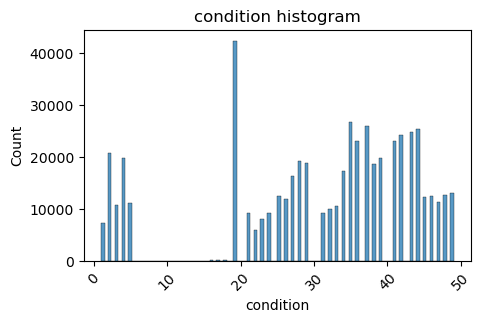

In [61]:
#Set plot size 
plt.figure(figsize = (5, 3)) 

# apply plot function 
htplt('condition')

- Vehicle **conditions** range from 10-49 with a median of 35. 
- Over 40K vehicles has a condition rating of 19, making it the most common condition. 
- The slight left skewed indicates the data contains higher condition ratings in general, which in within expectations.
    - Typically, newer vehicles would have higher condition rating than older ones.
    - According to the observations of manufactured year, the majority of vehicles in the dataset are newer vehicles

#### `mmr/sellingprice` 

Since mmr is an indicator of selling price, let's plot these side-by-side for comparison

Right Skew: 2.0
Median: 12250.0
LL: -9700.0 | UL: 35100.0
Rows of outliers : 16315
 


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Right Skew: 1.95
Median: 12100.0
LL: -10050.0 | UL: 35150.0
Rows of outliers : 16354
 


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


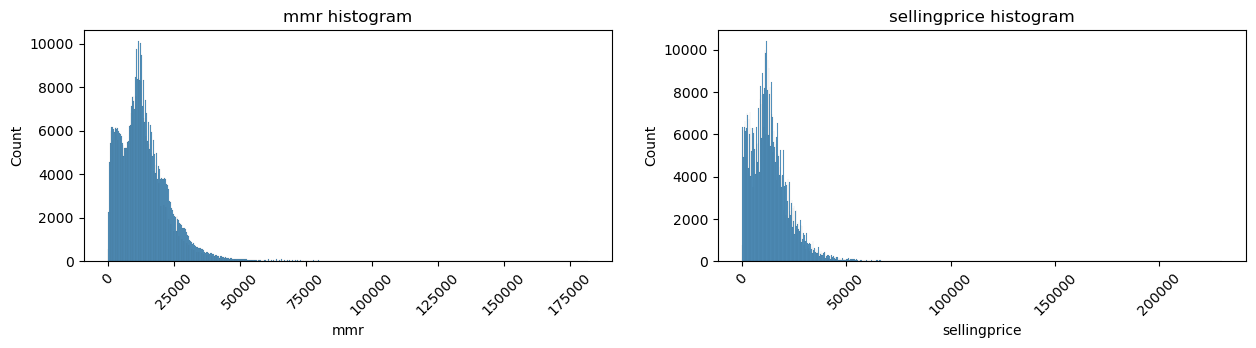

In [62]:
plt.figure(figsize = (15, 3)) 
plt.subplot(1, 2, 1) 
# apply plot function 
htplt('mmr')
         
plt.subplot(1, 2, 2)             
# apply plot function 
htplt('sellingprice')           

- The histogram plot for mmr and sellingprice are nearly identical, indicating the accuracy of mmr
- Both are right skewed with median around $12K

#### `odometer` 

Right Skew: 1.84
Median: 52254.0
LL: -77736.0 | UL: 205216.0
Rows of outliers : 10375
 


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


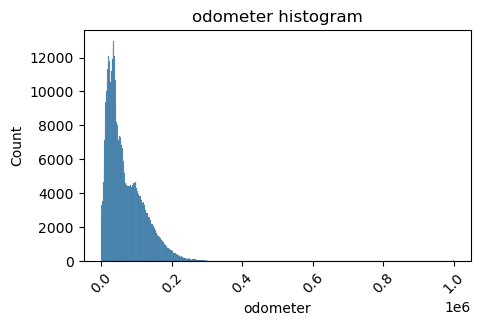

In [63]:
#Set plot size 
plt.figure(figsize = (5, 3)) 

# apply plot function 
htplt('odometer')

- Data is right skewed with median odometer reading around 52K

### Categorical Variables

Define a function to graph categorical variables

In [123]:
def ctplt(col):
  '''
  Function to graph countplots and display data labels
  '''
  
  ax = sns.countplot(x=df6[col], order=df6[col].value_counts(ascending=False).head(20).index)
  plt.xticks(rotation=45)
  plt.subplots_adjust(top=1) 

  # Loop through bars and add percentage labels
  for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df6)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

  # Display the plot
  plt.show()


#### `make` 

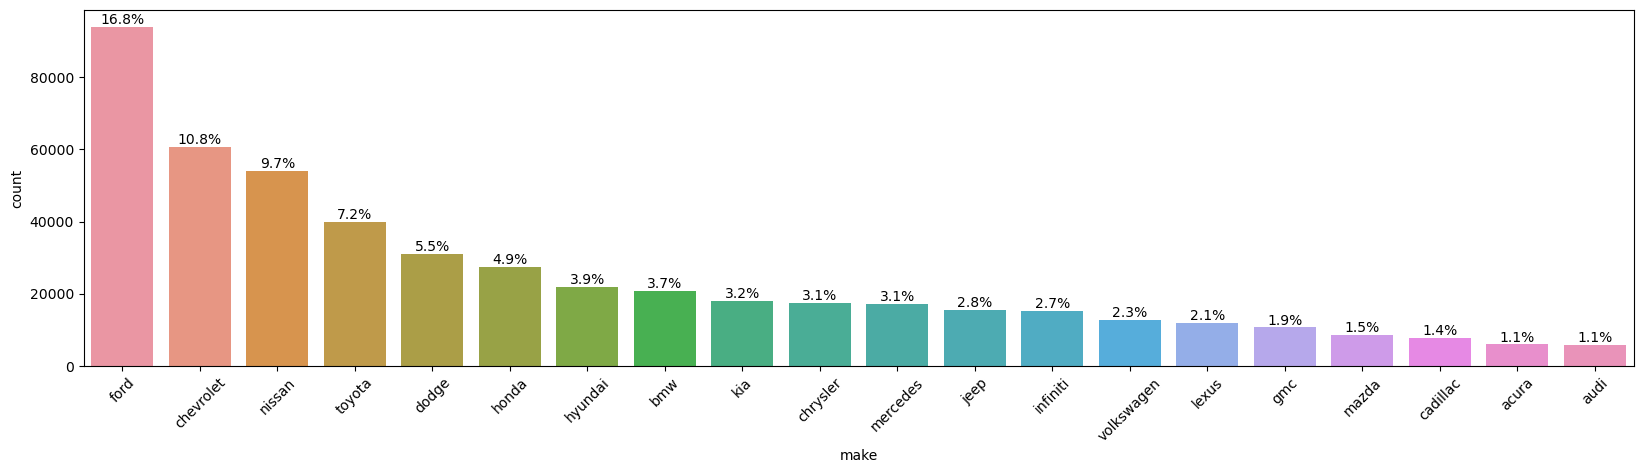

In [124]:
plt.figure(figsize=(20,4))
ctplt('make')

- The top 5 automakers with the most vehicle sales transactions are ford, chevrolet, nissan, toyota, and dodge.

#### `model`

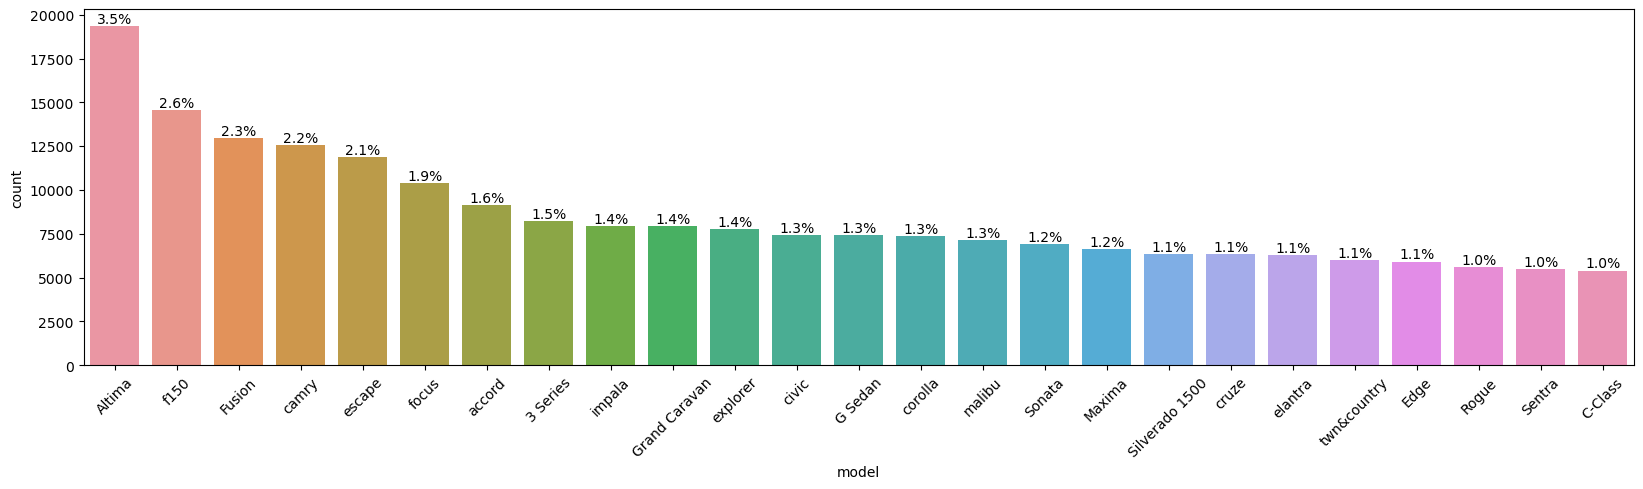

In [112]:
plt.figure(figsize=(20,4))
ctplt('model')

Most sold vehicles by `model` are Altima, F150, Fusion, Camry and Escape 

#### `trim`

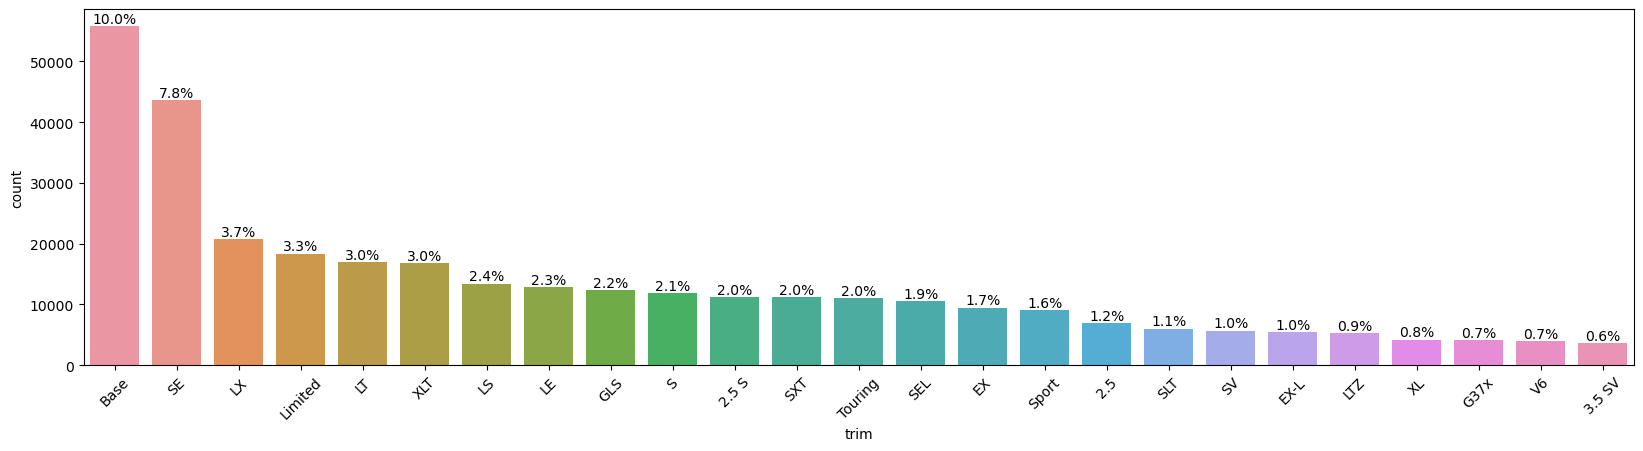

In [113]:
plt.figure(figsize=(20,4))
ctplt('trim')

Most sold vehicles by `trim` are Base, SE, LX, Limited, and LT

#### `body`

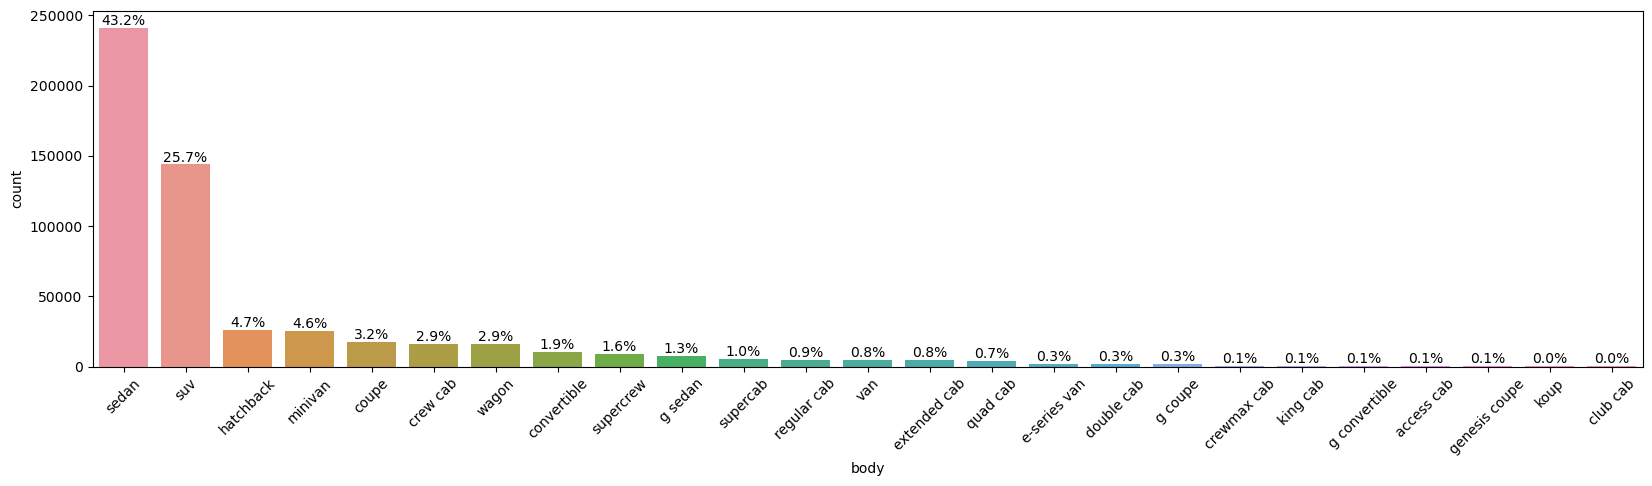

In [114]:
plt.figure(figsize=(20,4))
ctplt('body')

Most sold vehicles by `body` are 
- sedan sales makes up `~44%` of the market 
- suv sales make up `~23%` of the market

#### `transmission`

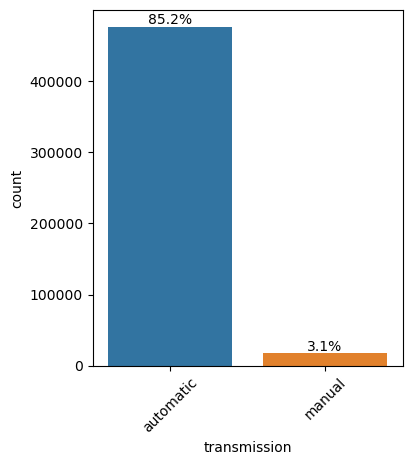

In [126]:
plt.figure(figsize=(4,4))
ctplt('transmission')

- 85.2% of vehicles has automatic transmission which dominates over manual.

#### `state`


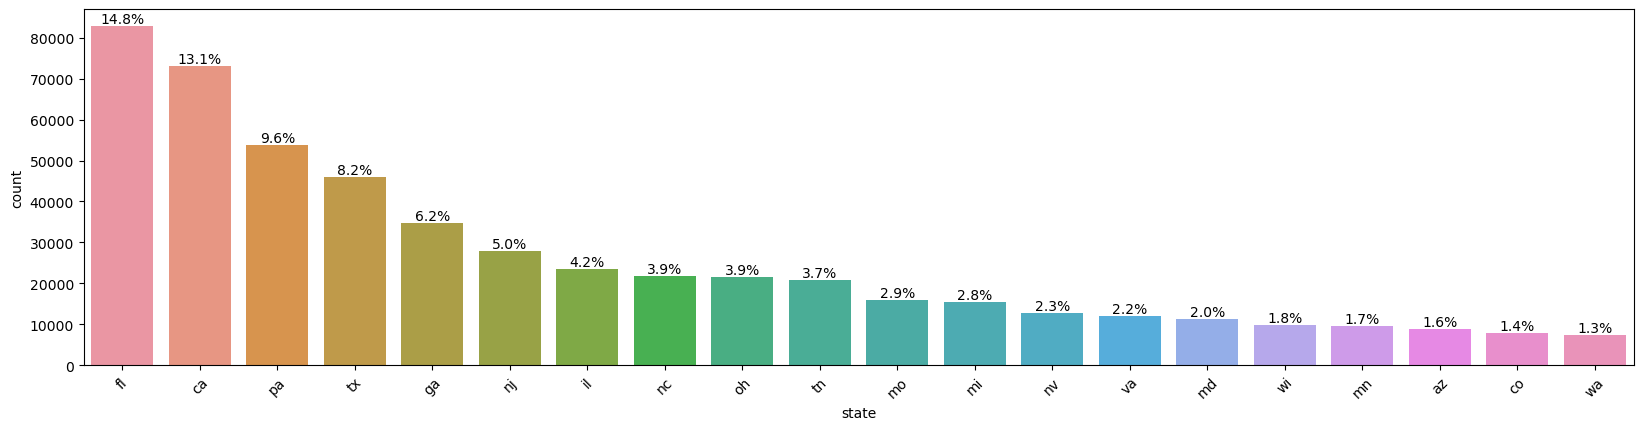

In [128]:
plt.figure(figsize=(20,4))
ctplt('state')

- most vehicles are sold in FL, followed by CA, PA, TX and GA

#### `color`


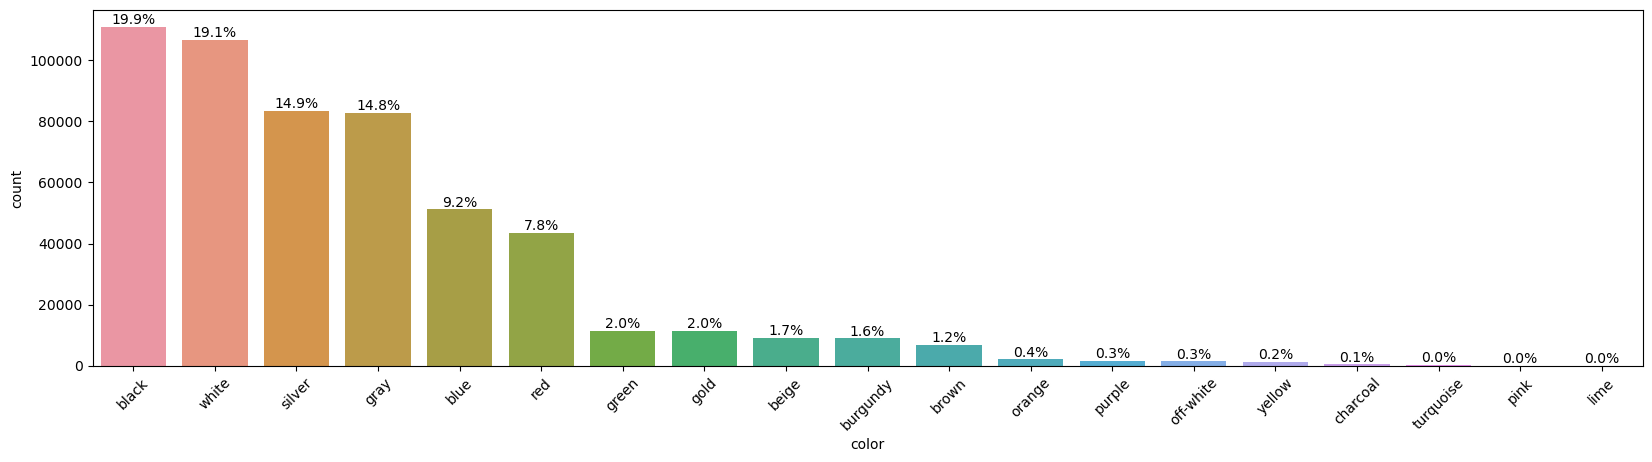

In [129]:
plt.figure(figsize=(20,4))
ctplt('color')

##### Most sold vehicles by `color` are 


In [80]:
df5['color'].value_counts(normalize=True).head(5)

color
black     0.208049
white     0.199994
silver    0.156344
gray      0.155342
blue      0.095883
Name: proportion, dtype: float64

- muted colors are more popular in the market with black and white leading at ~`20%`

#### `interior`


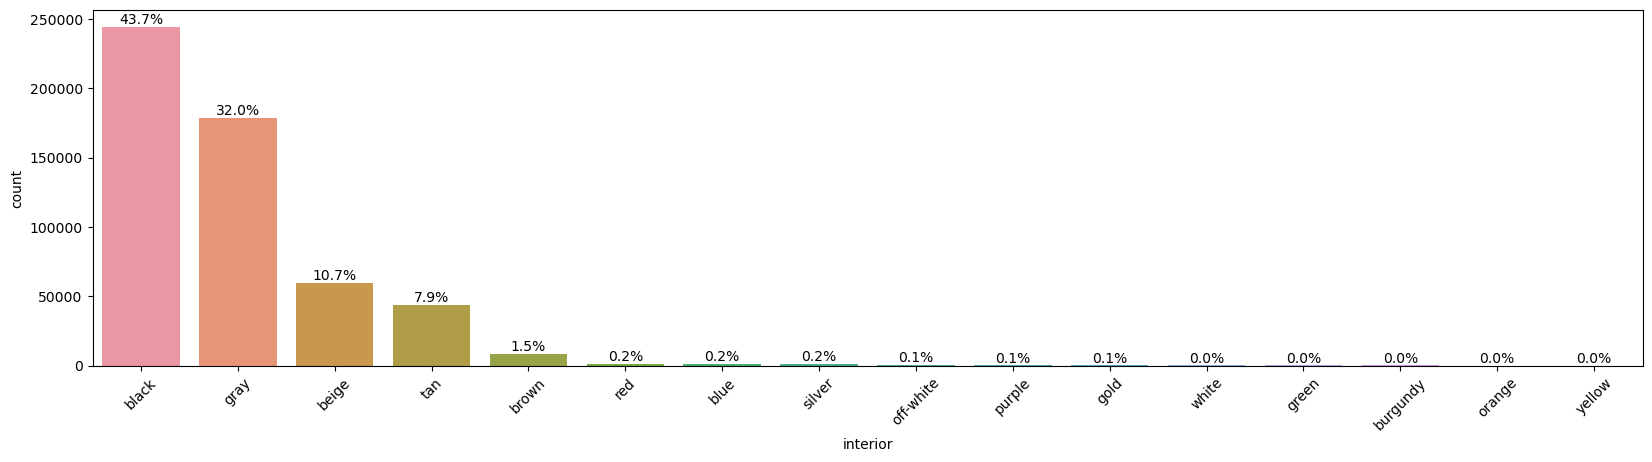

In [130]:
plt.figure(figsize=(20,4))
ctplt('interior')

- black and gray are most popular colors for interiors making over 70% of the market.

#### `weekday`


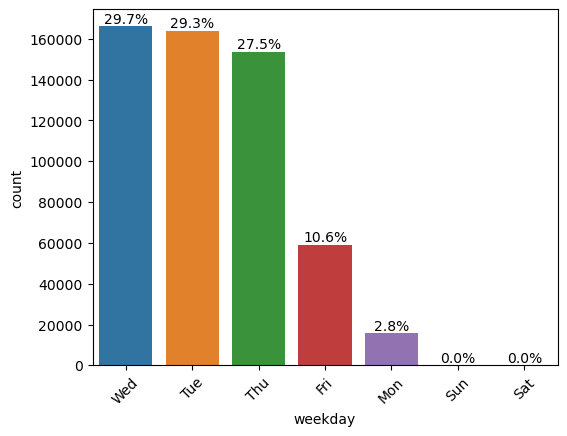

In [135]:
plt.figure(figsize=(6,4))
ctplt('weekday')

- most care sales occured on `Wed` > `Tues` > `Thurs`
- Least amount of vehicles were sold on the weekends.

#### `month`


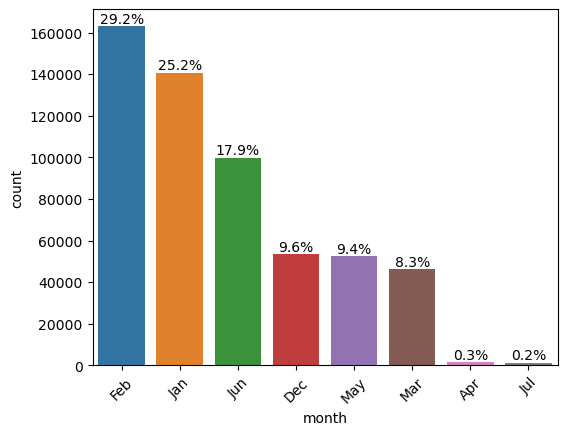

In [137]:
plt.figure(figsize=(6,4))
ctplt('month')

- most car sales in `Feb` and least in `Jul`

#### `day`


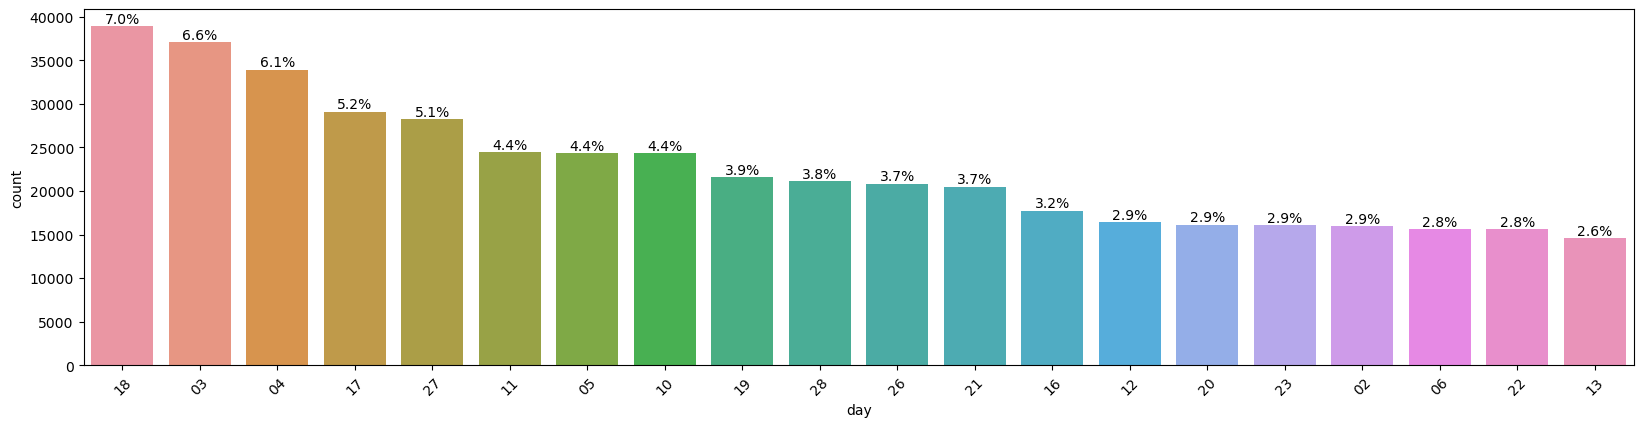

In [139]:
plt.figure(figsize=(20,4))
ctplt('day')

#### `sale_year`


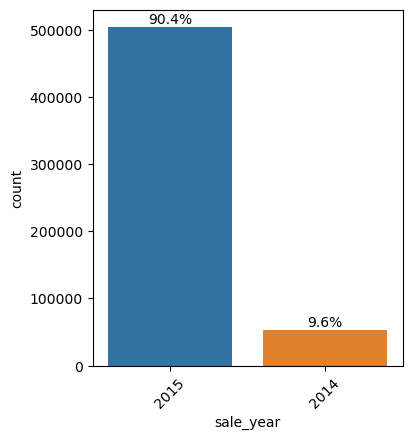

In [140]:
plt.figure(figsize=(4,4))
ctplt('sale_year')

### Bivarate Analysis

#### `Make` vs Selling price

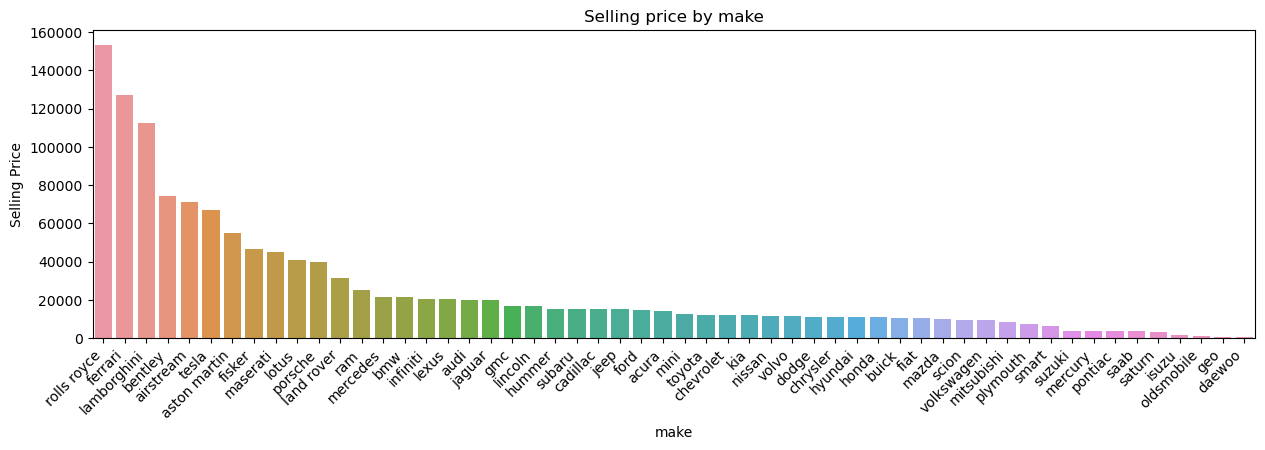

In [172]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,4))

order = df6.groupby(["make"])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df6, x='make', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by make", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("make")
plt.xticks(rotation=45, ha='right')
plt.show()

- Based on average selling price, rolls royce has the highest selling price followed by ferrari and lamborghini
- However, these are luxury makers and not a good representative for comparison across all makers
- It's best to categorize makes by tier to get better comparison between makes in the same tier

#### Make Tier

In [173]:
# copy df and save as new variable
df7=df6.copy()

In [174]:
# create a dictionary of replacements
model_positioning = {'kia':'mass market',
                    'bmw':'premium',
                    'volvo':'premium', 
                    'nissan':'mass market', 
                    'chevrolet':'mass market', 
                    'audi':'premium', 
                    'ford':'mass market',
                    'hyundai':'mass market', 
                    'buick':'semi-premium', 
                    'cadillac':'premium', 
                    'acura':'premium', 
                    'lexus':'premium', 
                    'infiniti': 'premium',
                    'jeep': 'semi-premium', 
                    'mercedes': 'premium', 
                    'mitsubishi': 'mass market', 
                    'mazda': 'mass market', 
                    'mini': 'semi-premium', 
                    'land rover': 'premium',
                    'lincoln': 'premium', 
                    'jaguar': 'premium', 
                    'volkswagen': 'semi-premium', 
                    'toyota': 'mass market', 
                    'subaru': 'semi-premium', 
                    'scion': 'mass market',       
                    'porsche': 'luxury',  
                    'dodge': 'mass market', 
                    'fiat': 'mass market', 
                    'chrysler': 'mass market', 
                    'ferrari': 'top of line', 
                    'honda': 'mass market', 
                    'gmc': 'mass market', 
                    'ram': 'mass market', 
                    'smart': 'semi-premium', 
                    'bentley': 'top of line', 
                    'pontiac': 'mass market', 
                    'saturn': 'mass market', 
                    'maserati': 'luxury',
                    'mercury': 'mass market', 
                    'hummer': 'mass market', 
                    'saab': 'other', 
                    'suzuki': 'mass market', 
                    'oldsmobile': 'other', 
                    'isuzu': 'other',              
                    'geo': 'other', 
                    'rolls royce': 'top of line', 
                    'daewoo': 'other', 
                    'plymouth': 'mass market', 
                    'tesla': 'semi-premium', 
                    'airstream': 'mass market',
                    'aston martin': 'top of line', 
                    'fisker': 'other', 
                    'lamborghini': 'top of line', 
                    'lotus':'semi-premium'
                     }

# replace values using the .map() method
df7['make_tier'] = df7['make'].map(model_positioning).fillna(df7['make'])

# print the DataFrame
df7[['make','make_tier']]

,make,make_tier
0,kia,mass market
1,kia,mass market
2,bmw,premium
3,volvo,premium
4,bmw,premium
...,...,...
529013,volkswagen,semi-premium
529622,volkswagen,semi-premium
548784,volkswagen,semi-premium
551222,volkswagen,semi-premium


In [160]:
df_ver = 'df: original dataframe \ndf1: remove duplicated unique values in make, model, body \ndf2: fixed transmission data errors \ndf3: convert "-" in color and interior to nan.\ndf4: split saledate column and dropped saledate,time,GMT,and PST columns \ndf5: filled in missing values for model. \ndf6: convert continuous columns back to float. \ndf7 = added make_tier column,'
print(df_ver)

df: original dataframe 
df1: remove duplicated unique values in make, model, body 
df2: fixed transmission data errors 
df3: convert "-" in color and interior to nan.
df4: split saledate column and dropped saledate,time,GMT,and PST columns 
df5: filled in missing values for model. 
df6: convert continuous columns back to float. 
df7 = added make_tier column,


#### `Make Tier` vs Selling price

In [206]:
def bvplt(col,target):
  '''
  Function to graph multiple variables and display data labels
  '''

  order = df7.groupby([col])[target].mean().sort_values(ascending=False).head(20).index
  ax=sns.barplot(df7, x=col, y=target, errorbar=None, order=order)
  plt.title(f'Selling price by {col}', fontsize=12)
  plt.ylabel("Selling Price")
  plt.xlabel(col)
  plt.xticks(rotation=45, ha='right')
  plt.subplots_adjust(top=1) 

  # Loop through bars and add percentage labels
  for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df7)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

  # Display the plot
  plt.show()


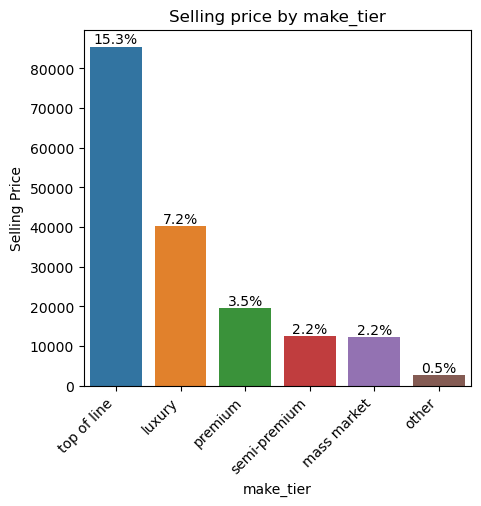

In [207]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5,4))

bvplt('make_tier','sellingprice')

#### `Year` vs Selling price

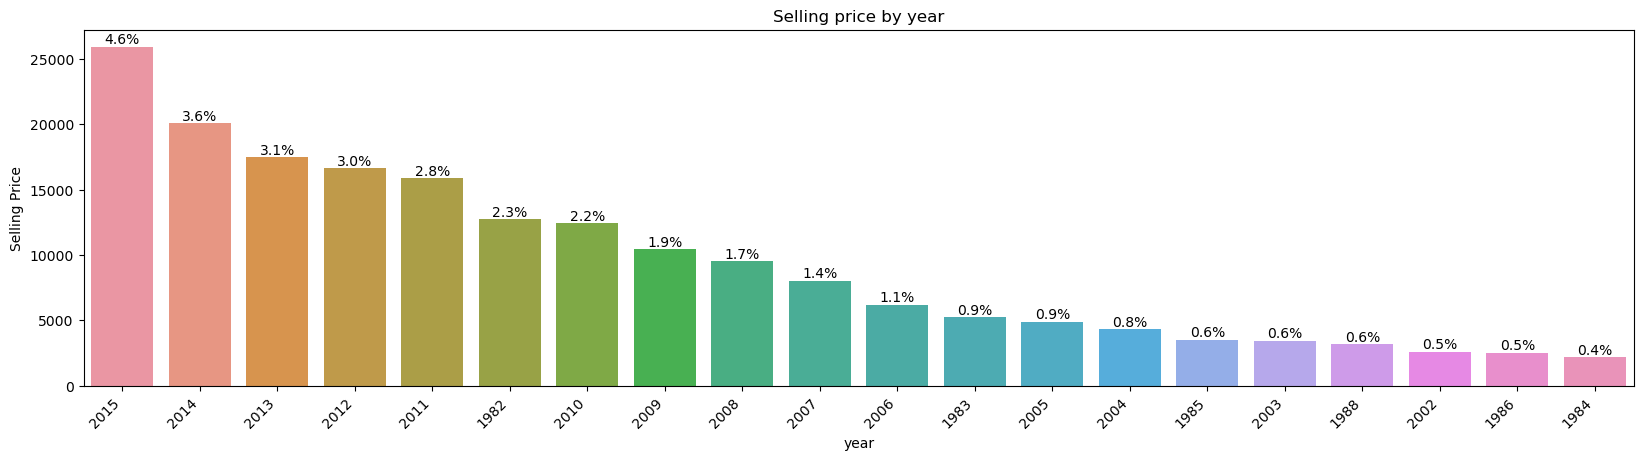

In [214]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 4))

bvplt('year', 'sellingprice')

- vehicles manufacturing between 2010-2015 have higher average selling price while older vehicles has less value.
- older vehicles show lower selling price however, `1982` shows decent selling price. is it premium? 


In [215]:
# Filter rows where year = 1982
df7.loc[df7['year'] == 1982]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
207920,1982,NaN,NaN,NaN,NaN,automatic,ca,2.0,85738.0,gold,gray,livermore toyota and livermore scion,6175.0,5000.0,Wed,Jan,28,2015,NaN
530893,1982,NaN,NaN,NaN,NaN,automatic,pa,4.0,18404.0,white,gray,adcock brothers inc,3675.0,20500.0,Thu,Jun,11,2015,NaN


- data does not show make/model for vehicles manufactured in `1982`

#### `Condition` vs Selling price

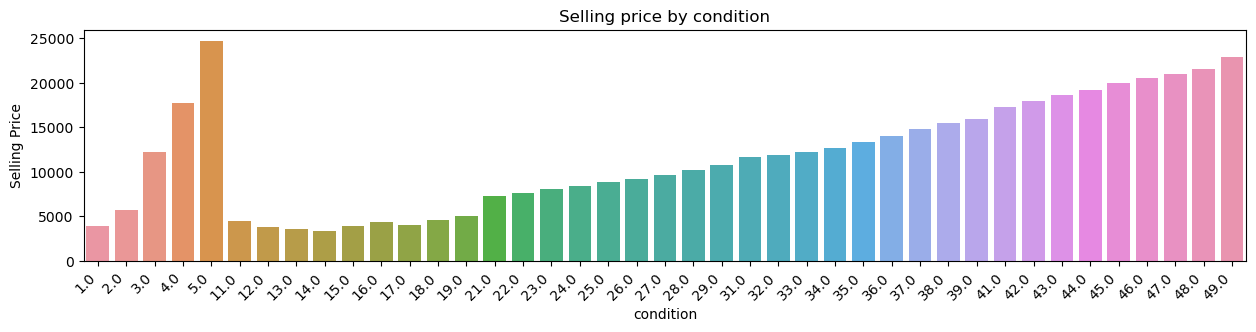

In [209]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 3))

sns.barplot(df7, x="condition", y='sellingprice', ax=ax, errorbar=None)
plt.title("Selling price by condition", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("condition")
plt.xticks(rotation=45, ha='right')
plt.show()

- in general, vehicles with higher condition rating have higher average selling price
- with some exceptions, some lower rated conditions (3,4,5) has highest average selling price.

In [151]:
# filter rows where conditions < 6
df6.loc[df6['condition'] <6].sort_values(by='sellingprice',ascending=False).head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year
283534,2014,bmw,i8,Base,coupe,automatic,fl,5.0,154.0,white,beige,american bank auto liquidators,170000.0,165000.0,Tue,Feb,10,2015
146917,2014,bmw,i8,Base,coupe,automatic,ca,5.0,60.0,white,brown,ferrari of orange county,176000.0,165000.0,Thu,Jan,15,2015
239357,2014,bmw,i8,Base,coupe,automatic,fl,5.0,530.0,gray,brown,auto plaza motor sports llc,170000.0,159000.0,Tue,Feb,10,2015
301118,2014,bmw,i8,Base,coupe,automatic,ca,5.0,603.0,white,beige,high bid trading co inc,163000.0,158000.0,Thu,Feb,12,2015
194738,2010,rolls royce,Ghost,Base,sedan,automatic,ca,4.0,19836.0,NaN,NaN,financial services remarketing (bmw int),146000.0,154000.0,Wed,Jan,28,2015


- The make for these vehicles are luxury car makers therefore, it's reasonable to have high selling price despite low condition rate


#### `Model` vs Selling price

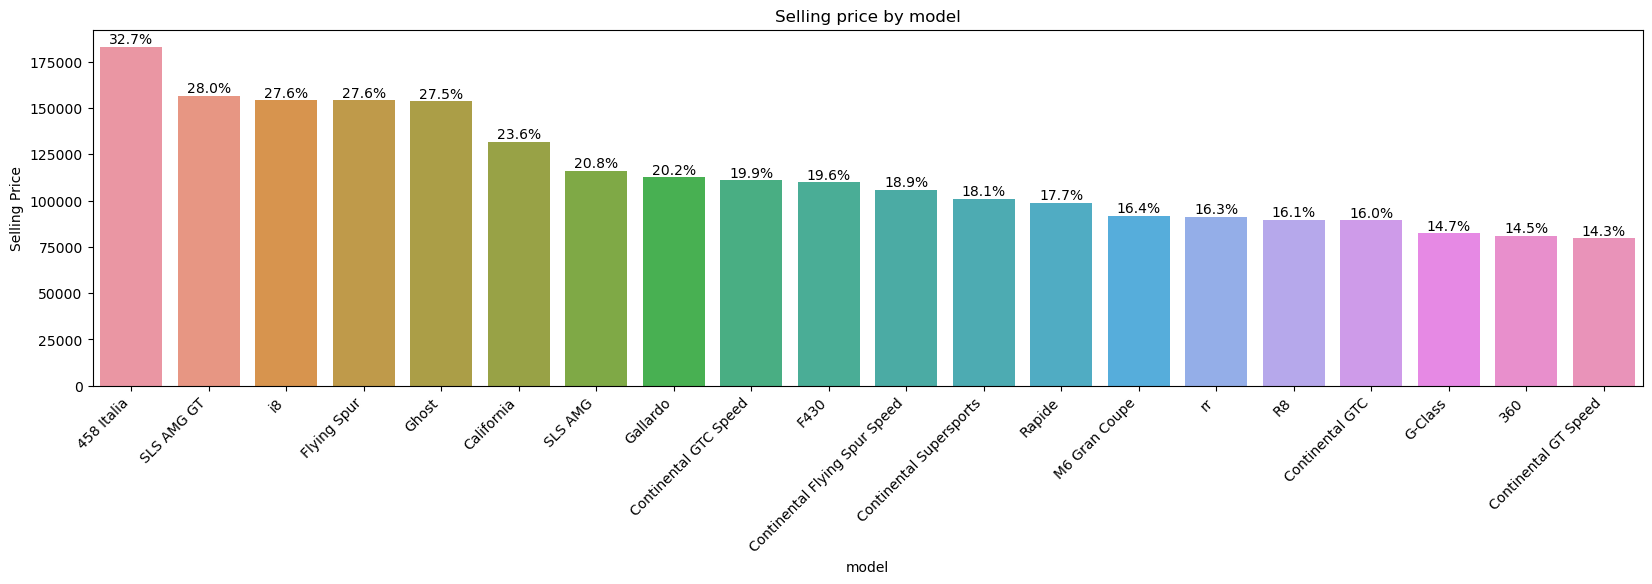

In [211]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20,4))

bvplt('model','sellingprice')

- based on average selling price, 458 Italia model has the highest selling price followed by 360 and 6 series gran coupe.
- however, these are higher tier car models and not a good representative for comparison across all models.
- should categorize models by make_tier to get better comparison between similar models.

#### `Model`/`Make_Tier` vs Selling price

Steps

1. Create a filter df for each make tier
2. then graph

##### Top of Line 

In [229]:
df_top = df7.loc[df7['make_tier'] == 'top of line']
df_top.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
1102,2012,ferrari,California,Base,convertible,automatic,ca,42.0,10902.0,gray,brown,chicago motor car corporation,149000.0,154000.0,Tue,Dec,30,2014,top of line
2584,2010,bentley,Continental GT Speed,Base,coupe,automatic,ca,3.0,15640.0,black,tan,porsche fin svcs dba bentley financial services,93000.0,96000.0,Thu,Dec,18,2014,top of line


In [237]:
def mmplt(col,target):
  '''
  Function to graph multiple variables and display data labels
  '''

  order = df_tier.groupby([col])[target].mean().sort_values(ascending=False).head(20).index
  ax=sns.barplot(df_tier, x=col, y=target, errorbar=None, order=order)
  plt.title(f'Selling price by {col}', fontsize=12)
  plt.ylabel("Selling Price")
  plt.xlabel(col)
  plt.xticks(rotation=45, ha='right')
  plt.subplots_adjust(top=2) 
  plt.show()


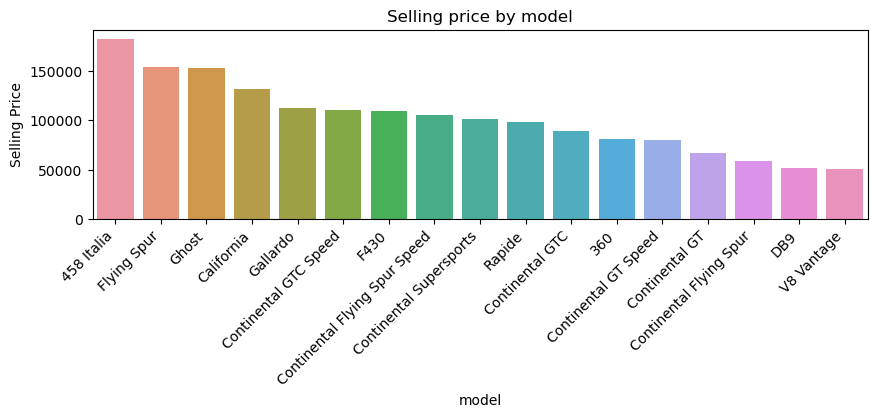

In [241]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,1))
df_tier = df_top

# define order the graph but also only showing top 50%
mmplt('model','sellingprice')

Top selling models for the top of the line car makers are 
1. 458 Italia - averages 183K
2. Flying Spur
3. Ghost

##### Luxury

In [242]:
df_lux = df7.loc[df7['make_tier'] == 'luxury']
df_lux.head(2)


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
592,2013,porsche,Cayenne,Base,suv,automatic,ca,37.0,15746.0,gray,black,the hertz corporation,49300.0,46500.0,Tue,Dec,16,2014,luxury
594,2013,porsche,911,Carrera S,convertible,automatic,ca,46.0,16868.0,black,black,porsche financial services,80000.0,88500.0,Thu,Dec,18,2014,luxury


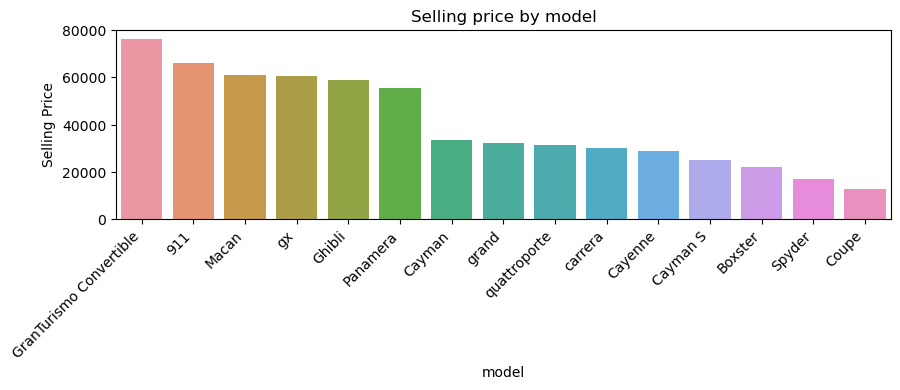

In [243]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,1))
df_tier = df_lux

# define order the graph but also only showing top 50%
mmplt('model','sellingprice')

> For luxury car makers, top selling models are
1. GranTurismo convertible
2. 911
3. Macan

##### Premium

In [244]:
df_prem = df7.loc[df7['make_tier'] == 'premium']
df_prem.head(2)


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015,premium
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015,premium


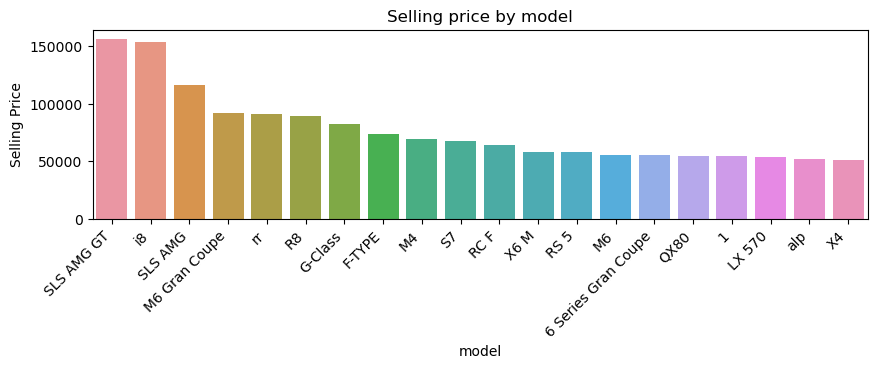

In [245]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,1))
df_tier = df_prem

# define order the graph but also only showing top 50%
mmplt('model','sellingprice')

##### Semi-Premium

In [247]:
df_semi = df7.loc[df7['make_tier'] == 'semi-premium']
df_semi.head(2)


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
35,2014,buick,Verano,Convenience Group,sedan,NaN,ca,2.0,19531.0,gray,gray,enterprise vehicle exchange / tra / rental / t...,15000.0,9200.0,Tue,Jan,06,2015,semi-premium
80,2014,buick,Enclave,Leather Group,suv,automatic,ca,1.0,14599.0,gray,black,enterprise vehicle exchange / tra / rental / t...,31000.0,24100.0,Tue,Dec,30,2014,semi-premium


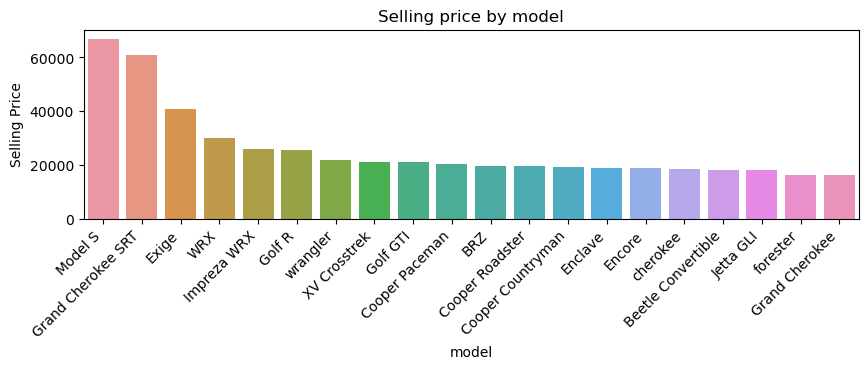

In [248]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,1))
df_tier = df_semi

# define order the graph but also only showing top 50%
mmplt('model','sellingprice')

##### Mass market

In [249]:
df_mass = df7.loc[df7['make_tier'] == 'mass market']
df_mass.head(2)


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,weekday,month,day,sale_year,make_tier
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014,mass market
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014,mass market


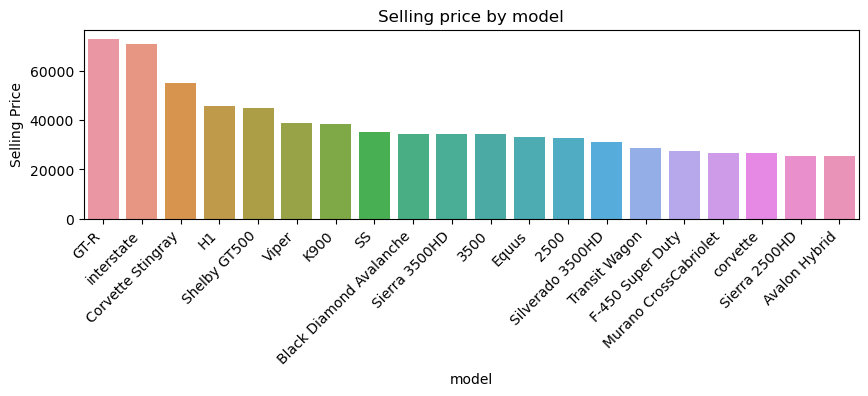

In [250]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,1))
df_tier = df_mass

# define order the graph but also only showing top 50%
mmplt('model','sellingprice')

#### Make Tier Statistics

In [251]:
#calculate the mean selling price by car maker tier
top_mean = round(df_top['sellingprice'].mean(),0)
lux_mean = round(df_lux['sellingprice'].mean(),0)
pre_mean = round(df_prem['sellingprice'].mean(),0)
semi_mean = round(df_semi['sellingprice'].mean(),0)
mass_mean = round(df_mass['sellingprice'].mean(),0)


print('Mean selling price by car maker tier')
print('Top of Line: ', top_mean)
print('Luxury: ', lux_mean)
print('Premium: ', pre_mean)
print('Semi-premium: ', semi_mean)
print('Mass market: ', mass_mean)

print('')

top_count =df_top.shape[0]
lux_count =df_lux.shape[0]
pre_count =df_prem.shape[0]
semi_count =df_semi.shape[0]
mass_count =df_mass.shape[0]

print('Count of vehiclescles by car maker tier')
print('Top of Line: ', top_count)
print('Luxury: ', lux_count)
print('Premium: ', pre_count)
print('Semi-premium: ', semi_count)
print('Mass market: ', mass_count)
print('')

top_sum = round(df_top['sellingprice'].sum(),0)
lux_sum =  round(df_lux['sellingprice'].sum(),0)
pre_sum = round(df_prem['sellingprice'].sum(),0)
semi_sum = round(df_semi['sellingprice'].sum(),0)
mass_sum =  round(df_mass['sellingprice'].sum(),0)

print('Sum selling price by car maker tier')
print('Top of Line: ', top_sum)
print('Luxury: ', lux_sum)
print('Premium: ', pre_sum)
print('Semi-premium: ', semi_sum)
print('Mass market: ',mass_sum)



Mean selling price by car maker tier
Top of Line:  85490.0
Luxury:  40294.0
Premium:  19618.0
Semi-premium:  12540.0
Mass market:  12293.0

Count of vehiclescles by car maker tier
Top of Line:  181
Luxury:  1538
Premium:  97608
Semi-premium:  41980
Mass market:  406126

Sum selling price by car maker tier
Top of Line:  15473750.0
Luxury:  61972601.0
Premium:  1914864808.0
Semi-premium:  526408673.0
Mass market:  4992364696.0


In [252]:
top_mean/mass_mean

6.954364272350118

In [253]:
mass_sum/top_sum

322.63444194199855

In [254]:
mass_sum/(top_sum+lux_sum+pre_sum+semi_sum)

1.982104016720189

- On average, top of the line vehicles sells 6x more than mass market vehicles

- however, there are more mass market vehicles than top of the line vehiclescles; therfore the overall sales genrated from mass marvehiclesvehicles is more than 300x that of top of the line vehicles

- sales of mass market vehicles are still 2x more than all other tiers combined


#### `Odometer` vs Selling price

##### Group odometer into bins

In [259]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df7['odometer_bins'] = pd.cut(df7['odometer'], bins=interval_range, labels=[1,2,3])
df7[['odometer','odometer_bins']].head(5)

,odometer,odometer_bins
0,16639.0,"(10000, 20000]"
1,9393.0,"(0, 10000]"
2,1331.0,"(0, 10000]"
3,14282.0,"(10000, 20000]"
4,2641.0,"(0, 10000]"


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


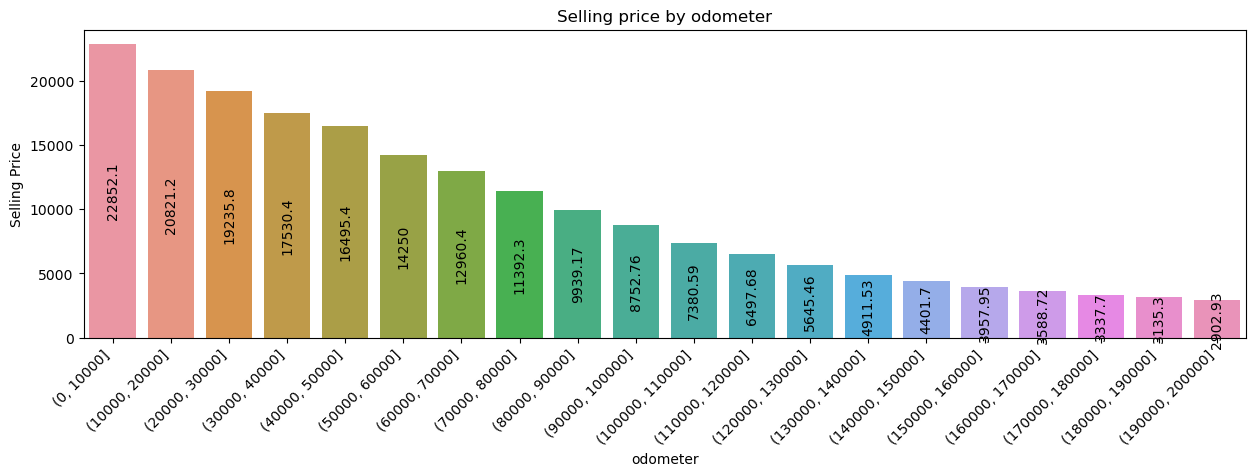

In [262]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

ax = sns.barplot(df7, x="odometer_bins", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by odometer", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("odometer")
plt.xticks(rotation=45, ha='right')
plt.show()



- average selling price is highest when vehicle's odometer is less than 10000

#### Day vs selling price

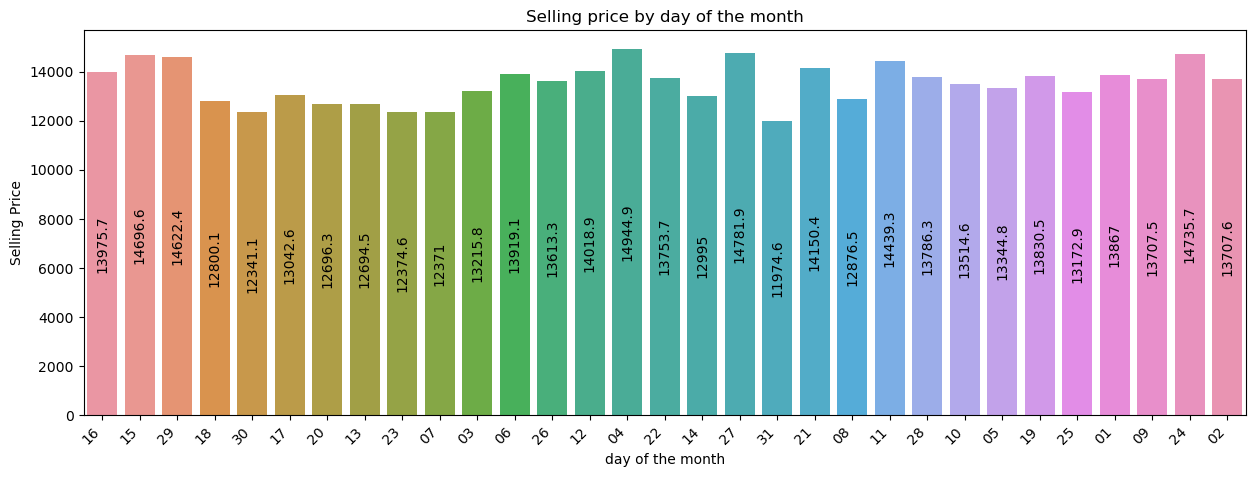

In [265]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df7.groupby(['day'])["sellingprice"].mean().index
ax = sns.barplot(df7, x="day", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by day of the month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



- no major standout when filtering average selling price by day of the month

#### Month vs selling price

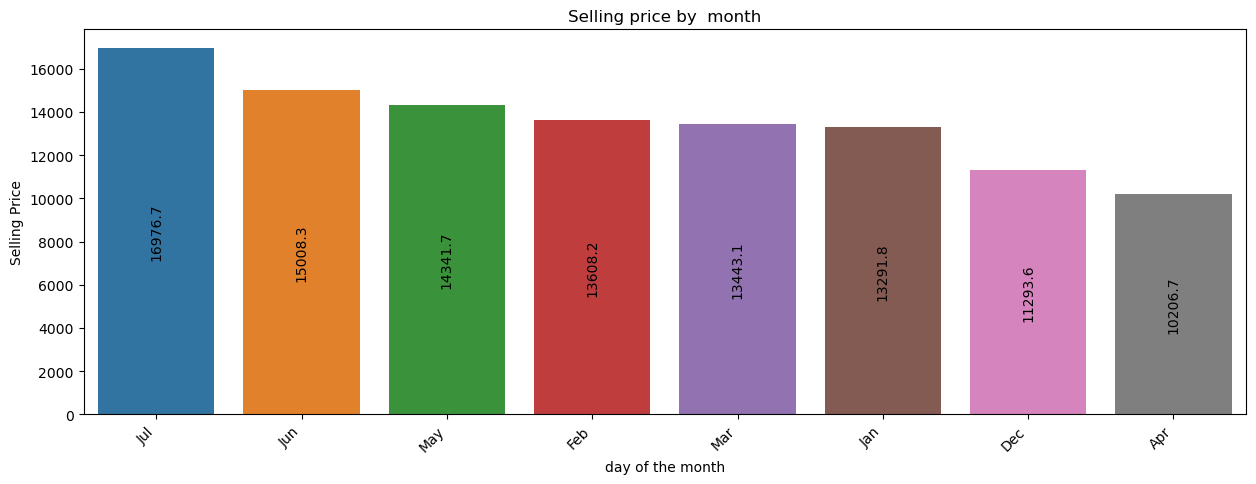

In [266]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df7.groupby(['month'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df7, x="month", y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by  month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



- Jul is the month with highest average selling price yet it was the month with least number of sales

#### State vs selling price

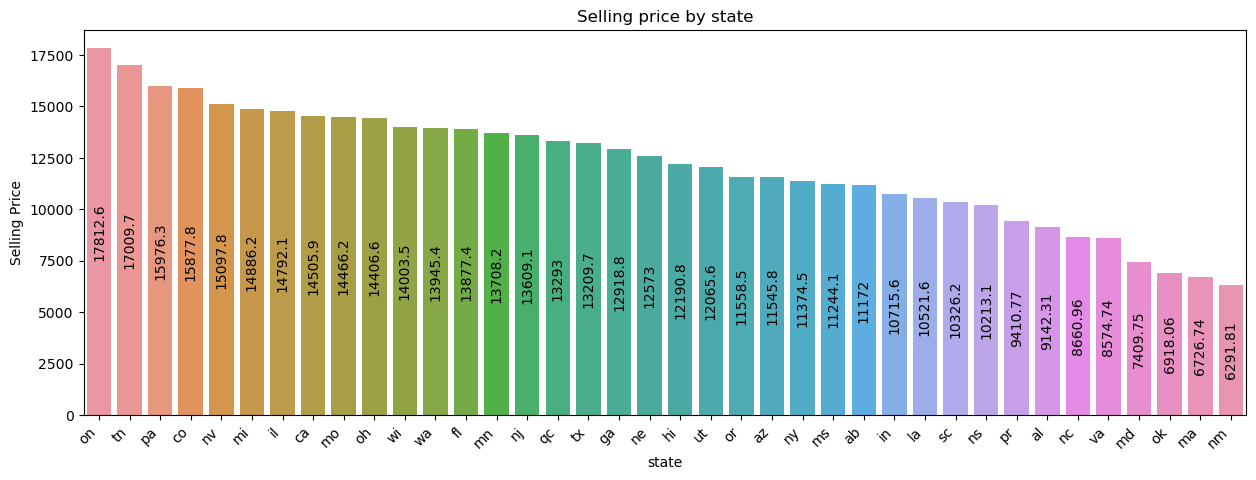

In [267]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df7.groupby(['state'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df7, x="state", y='sellingprice', ax=ax, errorbar=None, order =order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by state", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("state")
plt.xticks(rotation=45, ha='right')
plt.show()



- Ontario has the highest average selling price followed by tennesee and pennsylvania

# TASKS

- [x] convert `saledate` column
- [x] for `make` column : clean duplicate names, and rename some
- [x] for `body` column : clean duplicate names, and rename some
- [x] for `transmission` column : sedan is incorrect type, maybe change to NaN
- [x] for `state` column : data errors
    - [x] search for entries starting with `3vwd17a`
- [x] for `color` column : there are entries that are numeric, convert to text
- [x] for `interior` & `color` column : convert `-` to NaN?
- [] `trim` has entries = `!`, explore and clean 